In [ ]:
import pandas as pd
import numpy as np
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, matthews_corrcoef, roc_auc_score, f1_score
import matplotlib.pyplot as plt




##------------------------------------------------##

df = pd.read_csv('rna_seq_with_column_names.csv')
print("Dataset loaded successfully.")
print("Shape of the dataset:", df.shape)
print("\nFirst 5 rows of the dataset:")
display(df.head())




##----------------------------------------------##


exclude_cols = ['sample', 'tumor_status', 'cancer_type', "SRY", "ZFY", "RPS4Y1", "RPS4Y2", "AMELY", "TBL1Y", "PCDH11Y",
    "TGIF2LY", "TSPY1", "TSPY2", "USP9Y", "DDX3Y", "UTY", "TB4Y",
    "CYorf15A", "CYorf15B", "EIF1AY", "KDM5D", "XKRY", "HSFY1", "HSFY2",
    "PRY", "PRY2", "RBMY1A1", "DAZ1", "DAZ2", "DAZ3", "DAZ4", "CDY1",
    "CDY2", "VCY1", "VCY2",
    "CYorf15",
    "XIST", "TSIX",
    "TTTY1",
    "TTTY2",
    "TTTY3",
    "TTTY4",
    "TTTY5",
    "TTTY6",
    "TTTY7",
    "TTTY8",
    "TTTY9",
    "TTTY10",
    "TTTY11",
    "TTTY12",
    "TTTY13",
    "TTTY14",
    "TTTY15",]

print(df.shape)








genes_to_exclude = {
    # Y-Chromosome Gene List
    "SRY", "ZFY", "RPS4Y1", "RPS4Y2", "AMELY", "TBL1Y", "PCDH11Y",
    "TGIF2LY", "TSPY1", "TSPY2", "USP9Y", "DDX3Y", "UTY", "TB4Y",
    "CYorf15A", "CYorf15B", "EIF1AY", "KDM5D", "XKRY", "HSFY1", "HSFY2",
    "PRY", "PRY2", "RBMY1A1", "DAZ1", "DAZ2", "DAZ3", "DAZ4", "CDY1",
    "CDY2", "VCY1", "VCY2",
    "CYorf15",
    "XIST", "TSIX",
    "TTTY1",
    "TTTY2",
    "TTTY3",
    "TTTY4",
    "TTTY5",
    "TTTY6",
    "TTTY7",
    "TTTY8",
    "TTTY9",
    "TTTY10",
    "TTTY11",
    "TTTY12",
    "TTTY13",
    "TTTY14",
    "TTTY15",
}


Dataset loaded successfully.
Shape of the dataset: (8870, 12857)

First 5 rows of the dataset:


,100133144,100134869,155060,340602,388795,390284,553137,57714,645851,652919,...,ZSWIM5,ZSWIM6,ZWILCH,ZWINT,ZXDA,ZYG11A,ZYX,sample,tumor_status,cancer_type
0,2.03,2.96,7.87,2.03,0.00,1.16,0.0,9.07,4.53,4.43,...,8.75,9.51,8.03,8.66,6.05,0.69,11.92,TCGA-02-0047-01,Primary Tumor,glioblastoma multiforme
1,0.00,4.06,7.35,0.00,1.42,2.30,0.0,7.96,3.61,2.62,...,5.67,9.13,8.87,7.95,5.45,2.60,13.49,TCGA-02-0055-01,Primary Tumor,glioblastoma multiforme
2,1.98,3.90,7.09,0.88,0.00,1.43,0.0,7.43,4.70,0.00,...,7.79,8.87,9.42,9.39,4.35,5.50,12.31,TCGA-02-2483-01,Primary Tumor,glioblastoma multiforme
3,4.09,4.00,8.71,1.54,0.97,0.97,0.0,7.09,5.55,0.00,...,7.89,9.46,8.79,8.79,5.78,0.00,12.31,TCGA-02-2485-01,Primary Tumor,glioblastoma multiforme
4,2.71,2.54,8.11,1.15,1.15,1.15,0.0,8.48,3.43,0.00,...,6.64,8.66,7.39,6.24,5.03,0.00,12.93,TCGA-02-2486-01,Primary Tumor,glioblastoma multiforme


(8870, 12857)


In [ ]:
features = [col for col in df.columns if col not in exclude_cols]
X = df[features]

# Target (y) is the 'cancer_type' column
y = df['cancer_type']

print(f"Number of features (genes): {len(features)}")
print(f"Number of samples: {len(df)}")
print(f"Number of unique cancer types: {y.nunique()}")
print("\nCancer Types Distribution:")
print(y.value_counts())

# Encode string labels to integer labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
class_names = label_encoder.classes_

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nData splitting and scaling complete.")
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")


Number of features (genes): 12838
Number of samples: 8870
Number of unique cancer types: 32

Cancer Types Distribution:
cancer_type
breast invasive carcinoma                1211
kidney clear cell carcinoma               605
lung adenocarcinoma                       574
thyroid carcinoma                         564
head & neck squamous cell carcinoma       564
lung squamous cell carcinoma              554
brain lower grade glioma                  516
prostate adenocarcinoma                   516
bladder urothelial carcinoma              427
liver hepatocellular carcinoma            421
colon adenocarcinoma                      327
kidney papillary cell carcinoma           322
cervical & endocervical cancer            308
sarcoma                                   261
uterine corpus endometrioid carcinoma     200
pancreatic adenocarcinoma                 182
pheochromocytoma & paraganglioma          182
glioblastoma multiforme                   161
testicular germ cell tumor              

#DT  WITH Depth = 5

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:

print("--- Training Decision Tree Classifier With Depth = 5 ---")

# Predictions and Probability Predictions
y_pred_dt = dt_model.predict(X_test_scaled)
y_proba_dt = dt_model.predict_proba(X_test_scaled)



##--------------------------------##

#SHAP

# Create SHAP explainer for Random Forest
explainer = shap.TreeExplainer(dt_model)

# Get SHAP values for the first 500 samples of X_test
# Use the scaled test data (X_test_scaled) which was used for training
shap_values = explainer.shap_values(X_test[:500])

print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of SHAP values: {shap_values.shape}")



##---------------------------------##
# PREPROCESS


top_genes_per_class_DT_with_depth = {}
N = 5 # Let's find the top 5 genes for each class

# Iterate through the classes (the third dimension of shap_values)
# shap_values shape: (samples, features, classes)
for i in range(shap_values.shape[2]):
    # Calculate the mean absolute SHAP value for each gene across all samples for the current class
    global_importance = np.mean(np.abs(shap_values[:, :, i]), axis=0)

    # Create a DataFrame for easy sorting
    importance_df = pd.DataFrame({
        'Gene': X.columns,
        'SHAP_Importance': global_importance
    })

    # --- NEW STEP: Filter out the sex-specific genes ---
    filtered_importance_df = importance_df[~importance_df['Gene'].isin(genes_to_exclude)]
    # ----------------------------------------------------

    # Sort by importance and get the top N genes from the *filtered* list
    top_genes = filtered_importance_df.sort_values(by='SHAP_Importance', ascending=False).head(N)

    # Store the results using the actual class name
    class_name = class_names[i]
    top_genes_per_class_DT_with_depth[class_name] = top_genes['Gene'].tolist()

# Print the top genes for all classes
print("Top 5 Tumor-Specific Genes per Class (Sex-Specific Genes Removed):")
for class_name, genes in top_genes_per_class_DT_with_depth.items():
    print(f" {class_name}: {genes}")


#--------------------------------------##


#VIZ THE FEATURES


--- Training Decision Tree Classifier With Depth = 5 ---
Shape of X_test: (1774, 12838)
Shape of SHAP values: (500, 12838, 32)
Top 5 Tumor-Specific Genes per Class (Sex-Specific Genes Removed):
 adrenocortical cancer: ['TRPS1', 'PA2G4P4', 'TG', 'SFTPA1', 'KLK3']
 bladder urothelial carcinoma: ['TRPS1', 'CANT1', 'LOC678655', 'PA2G4P4', 'TG']
 brain lower grade glioma: ['PA2G4P4', 'TRPS1', 'TG', 'SFTPA1', 'KLK3']
 breast invasive carcinoma: ['TRPS1', 'CTAGE1', 'AZGP1', 'PA2G4P4', 'TG']
 cervical & endocervical cancer: ['TRPS1', 'PA2G4P4', 'TG', 'SFTPA1', 'KLK3']
 cholangiocarcinoma: ['TRPS1', 'PA2G4P4', 'TG', 'SFTPA1', 'KLK3']
 colon adenocarcinoma: ['PA2G4P4', 'TRPS1', 'TG', 'SFTPA1', 'KLK3']
 diffuse large B-cell lymphoma: ['TRPS1', 'PA2G4P4', 'TG', 'SFTPA1', 'KLK3']
 esophageal carcinoma: ['TRPS1', 'PA2G4P4', 'TG', 'SFTPA1', 'KLK3']
 glioblastoma multiforme: ['PA2G4P4', 'TRPS1', 'TG', 'SFTPA1', 'KLK3']
 head & neck squamous cell carcinoma: ['CTAGE1', 'TRPS1', 'PA2G4P4', 'TG', 'KLK3']


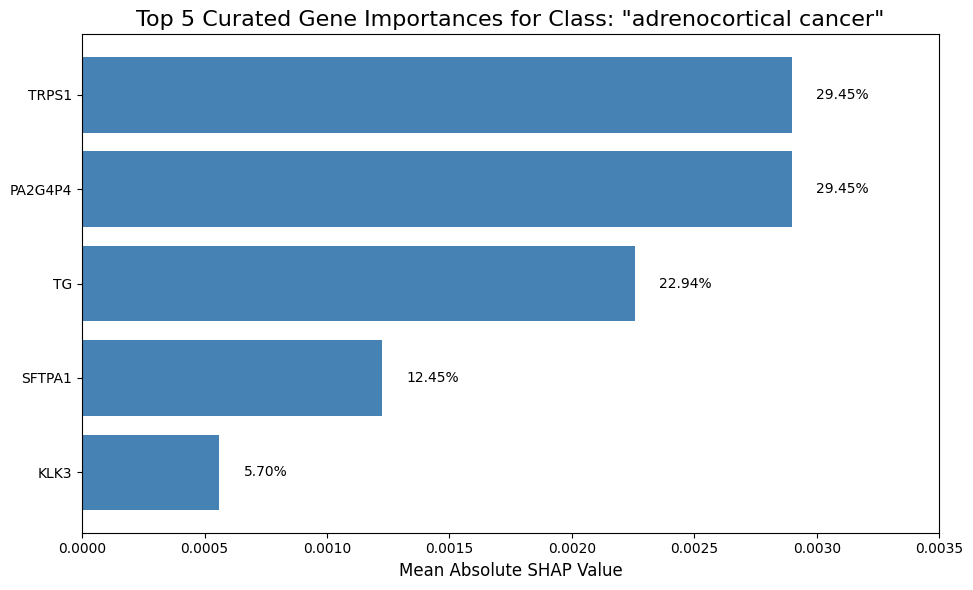

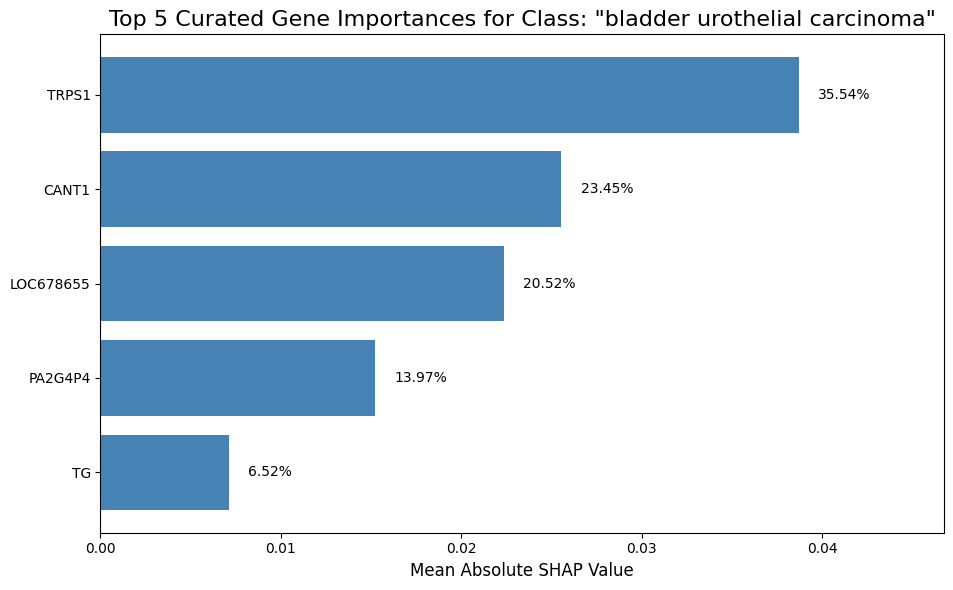

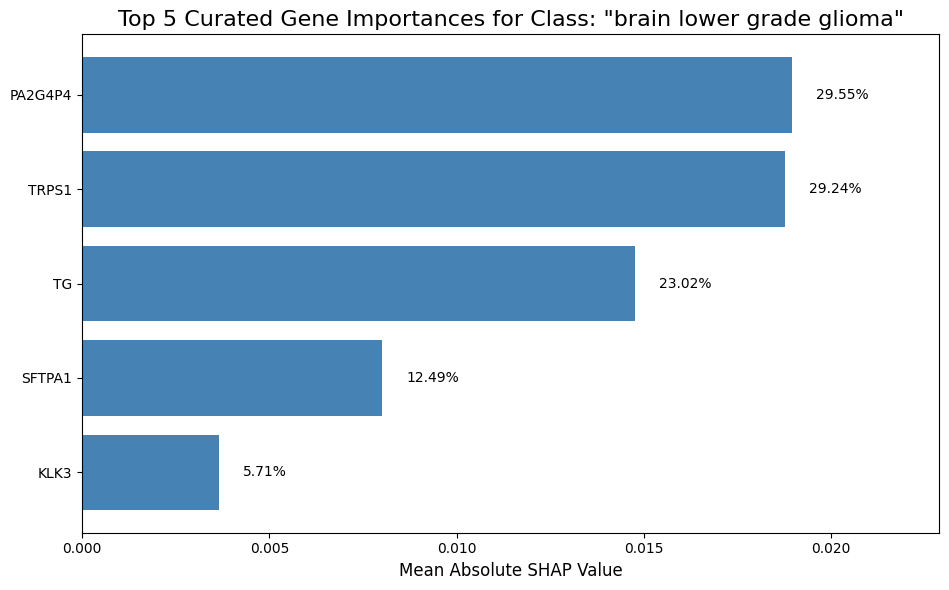

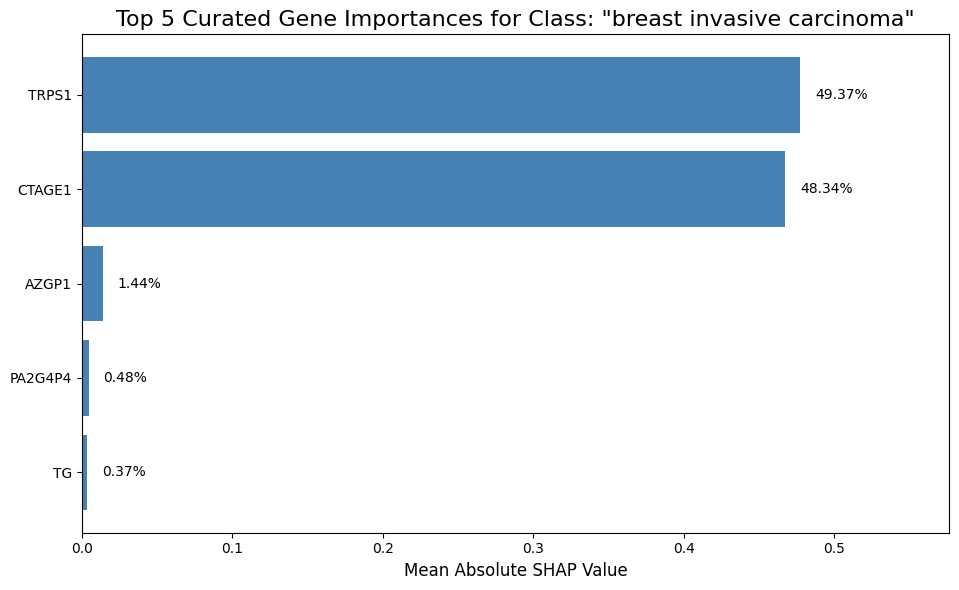

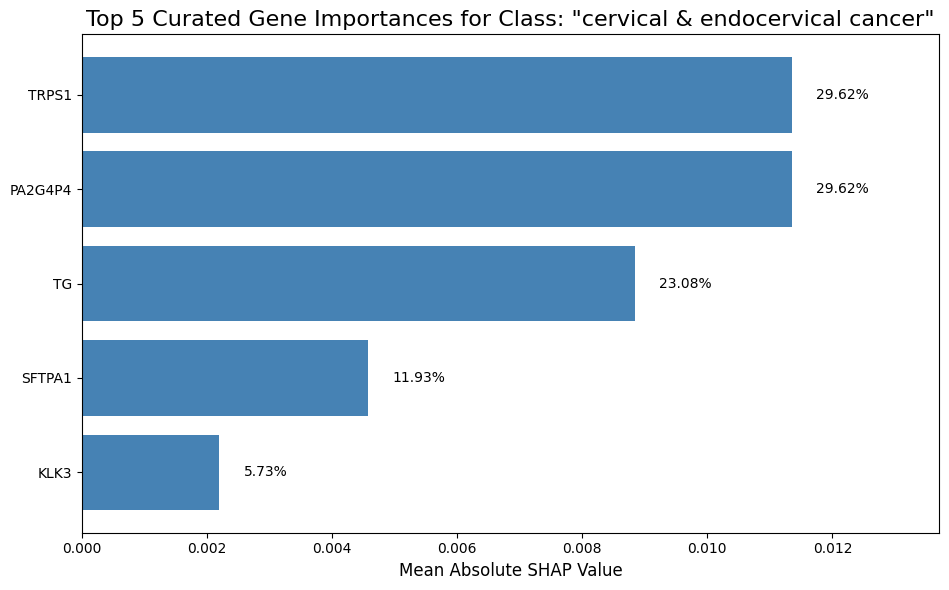

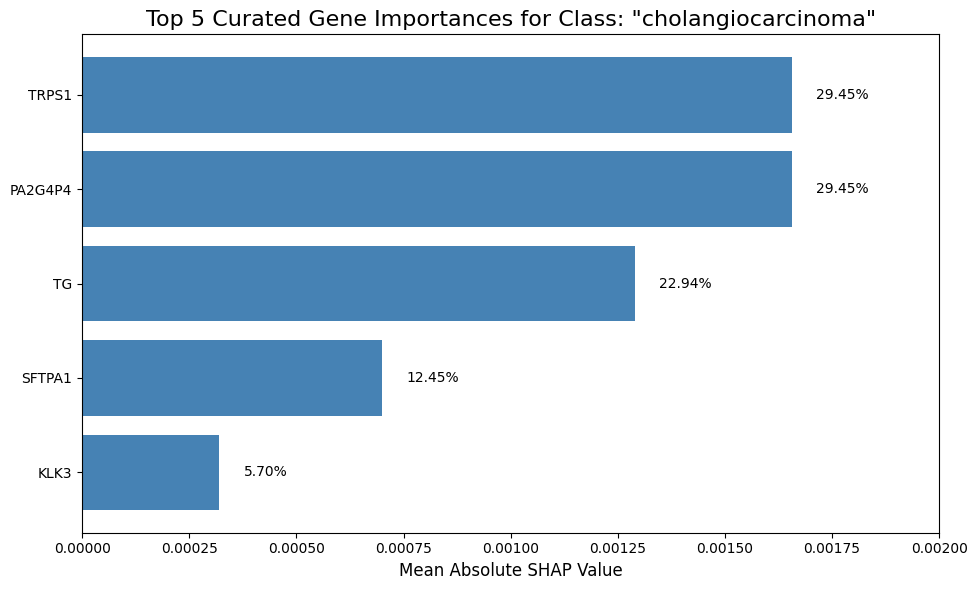

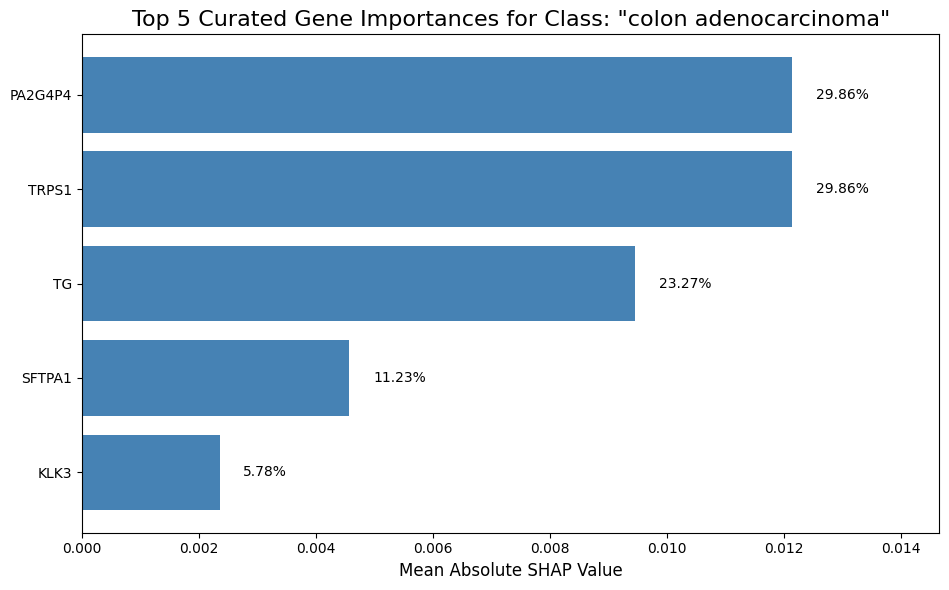

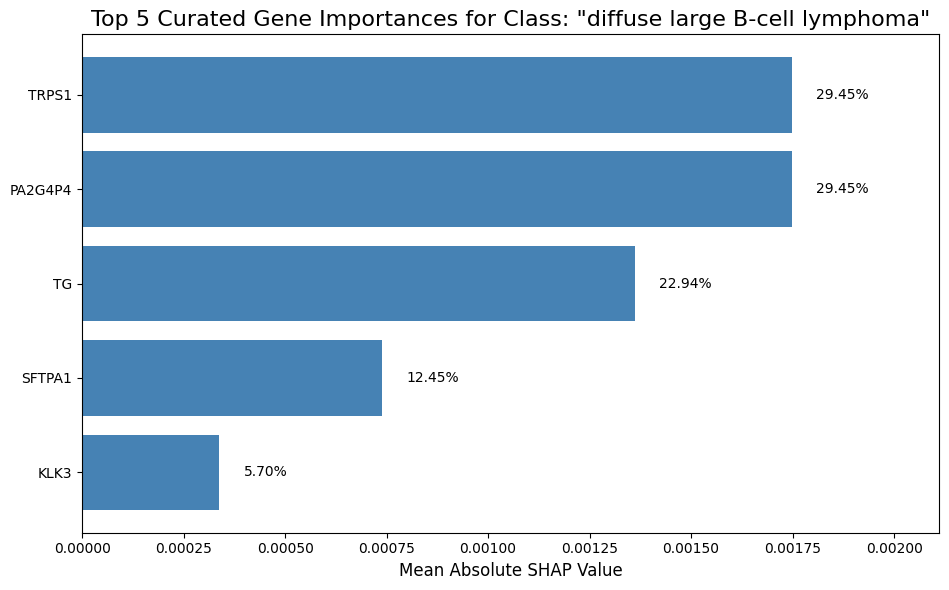

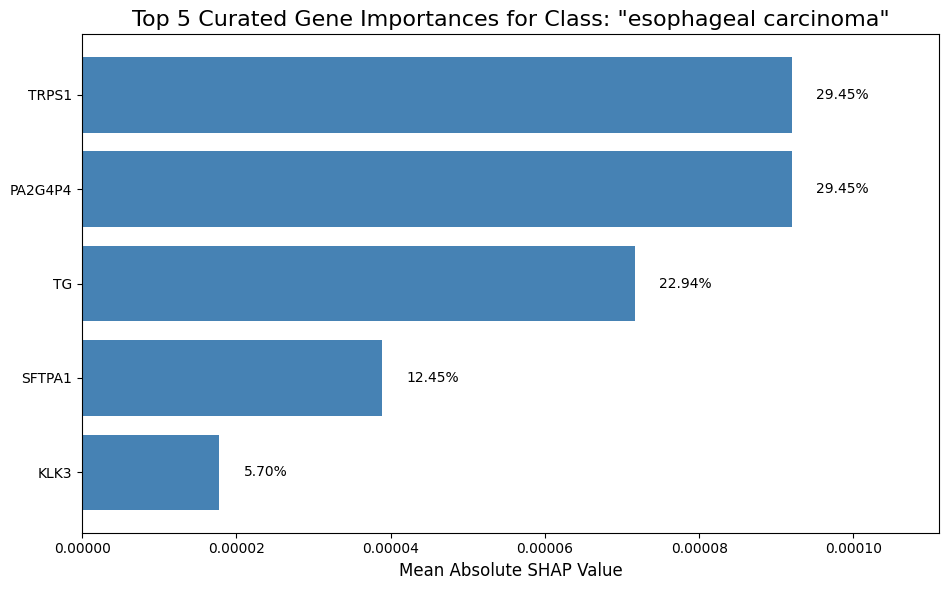

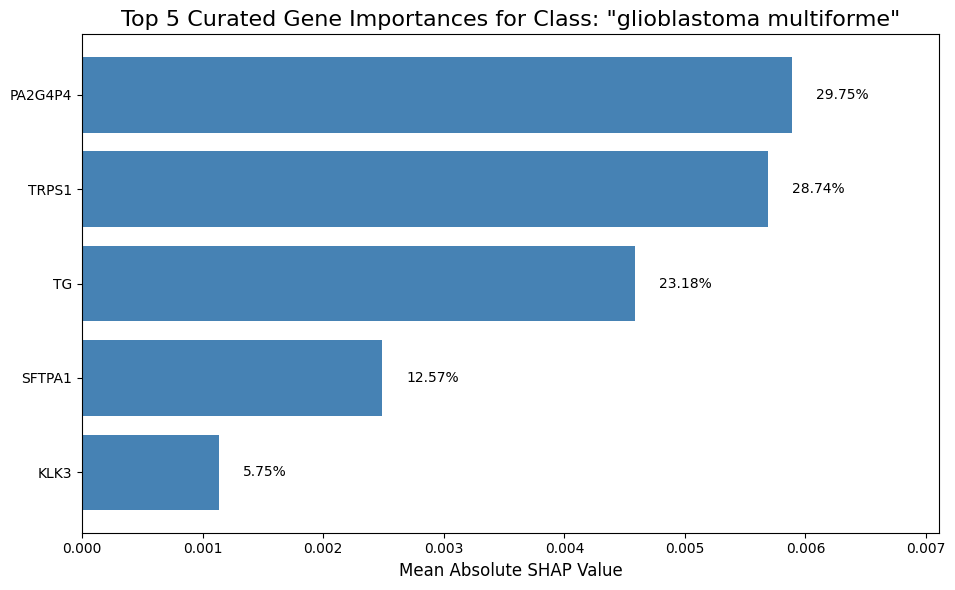

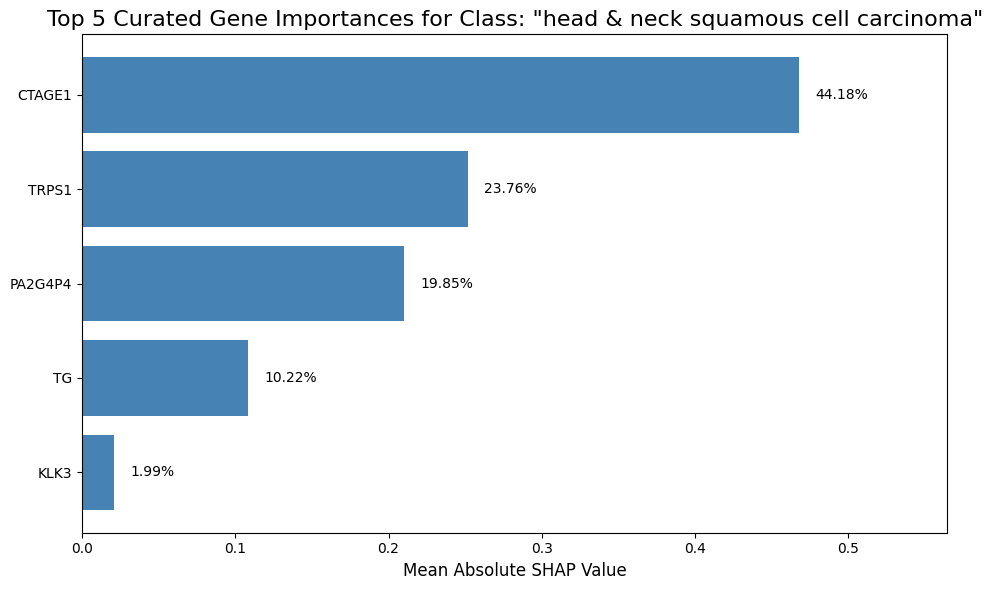

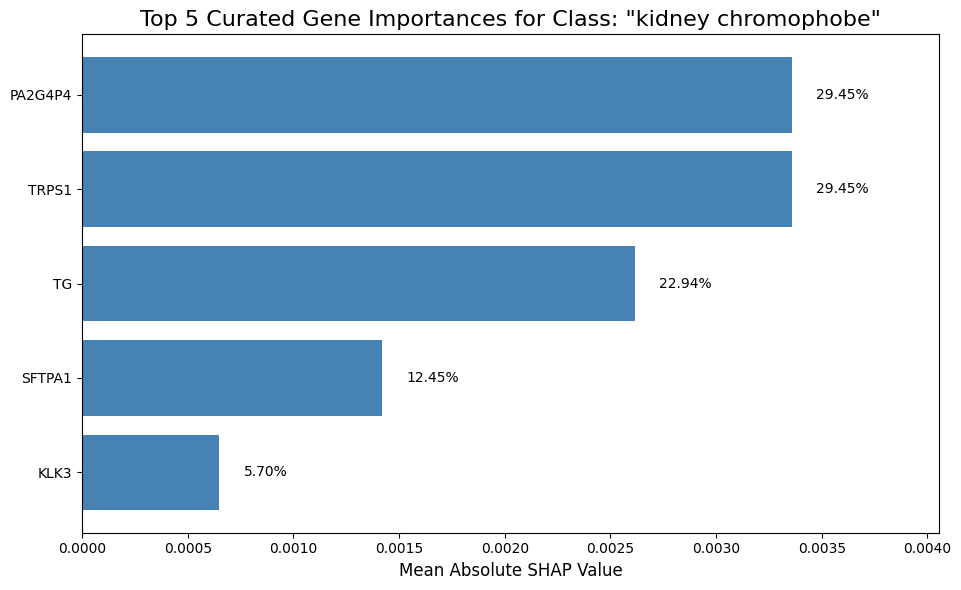

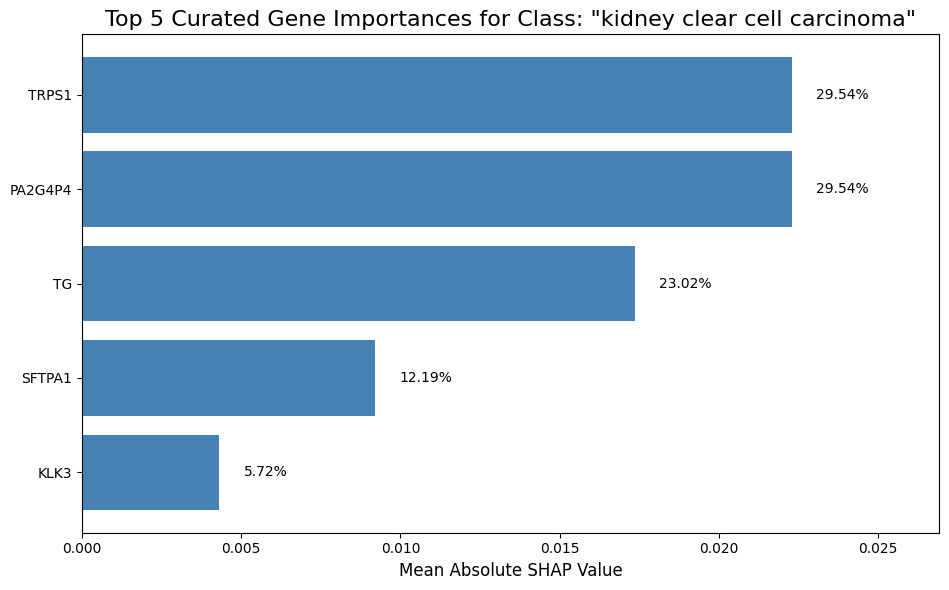

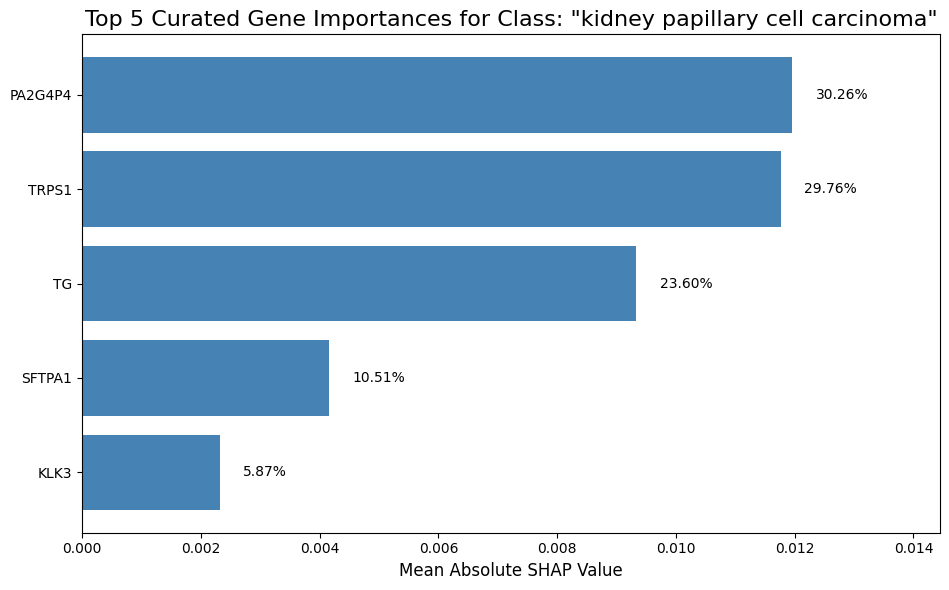

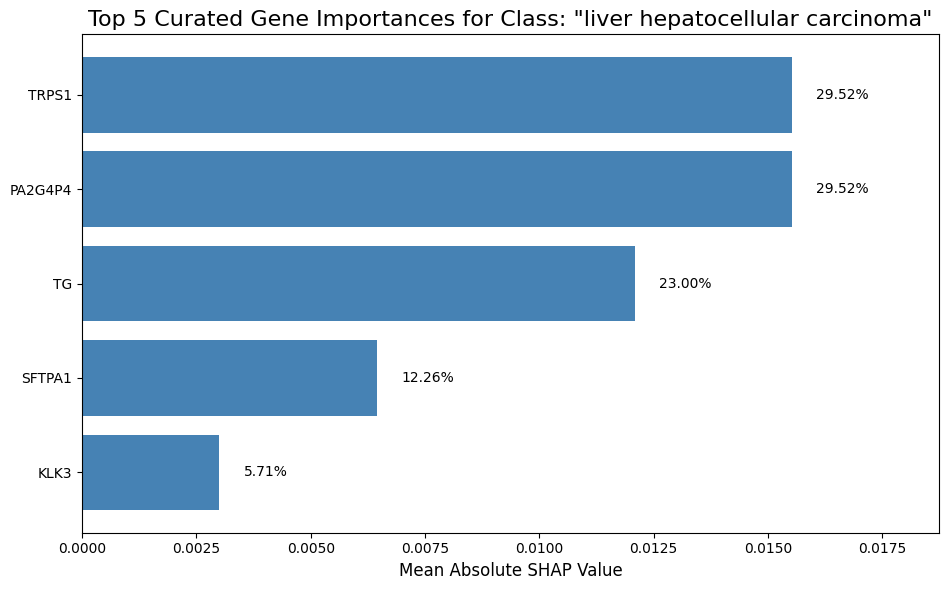

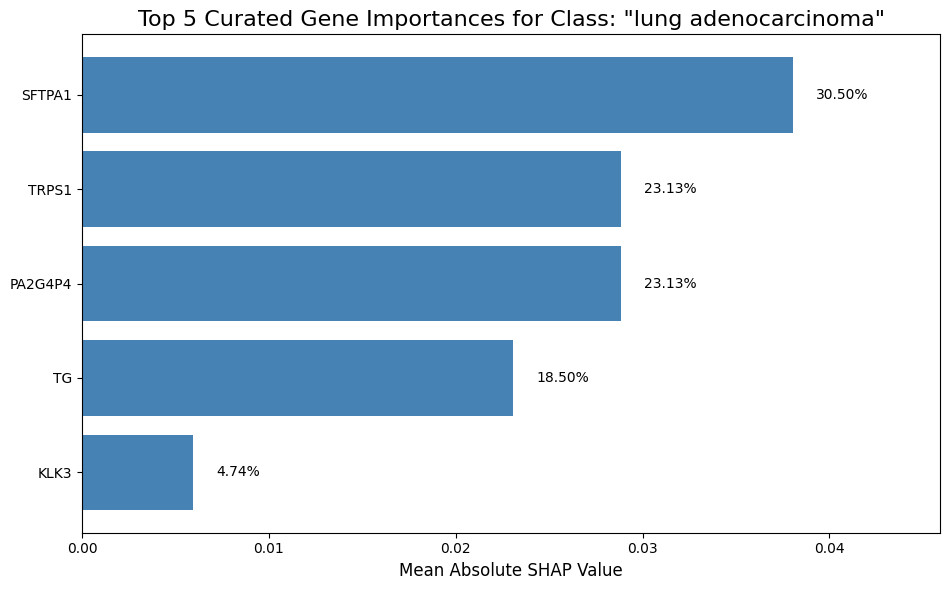

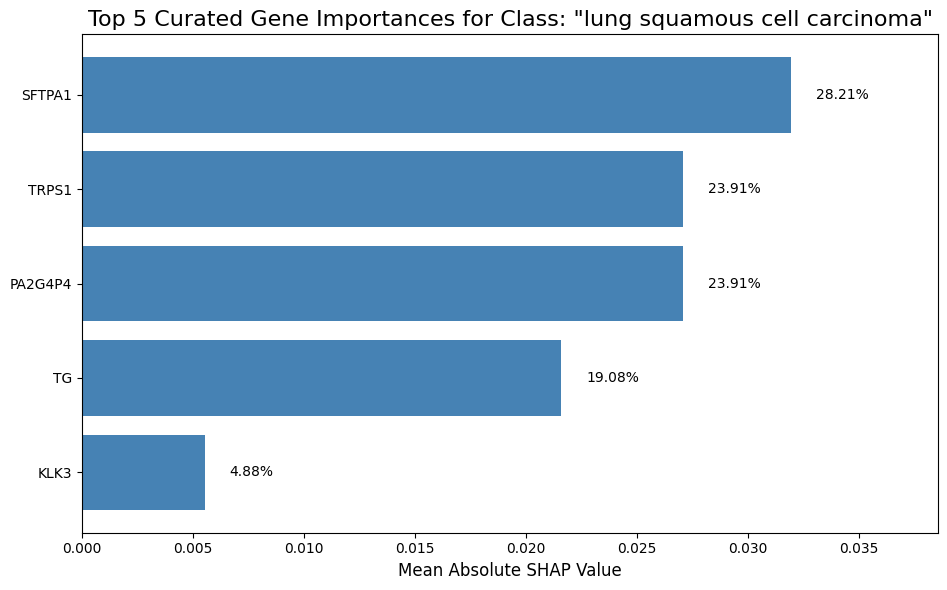

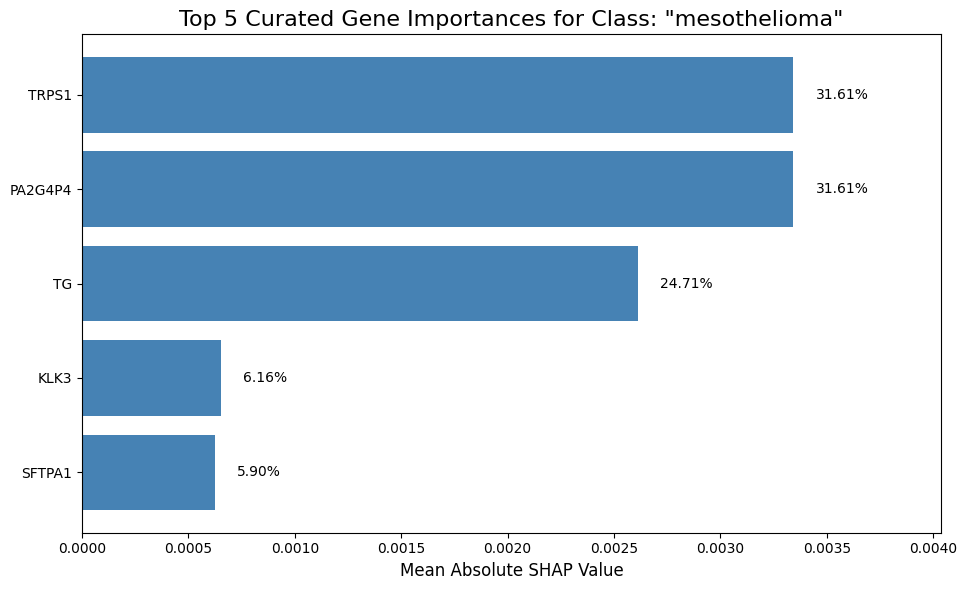

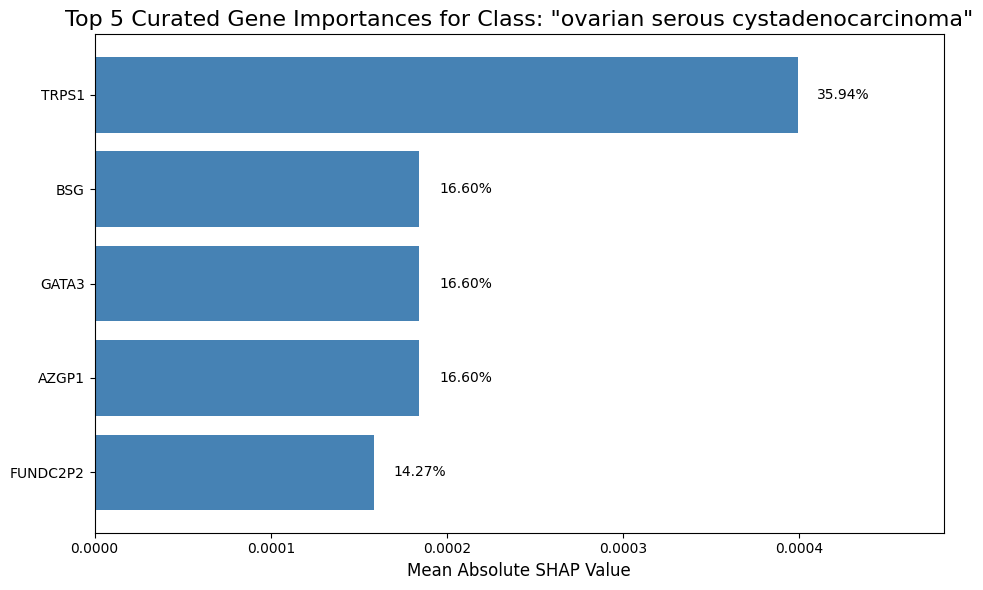

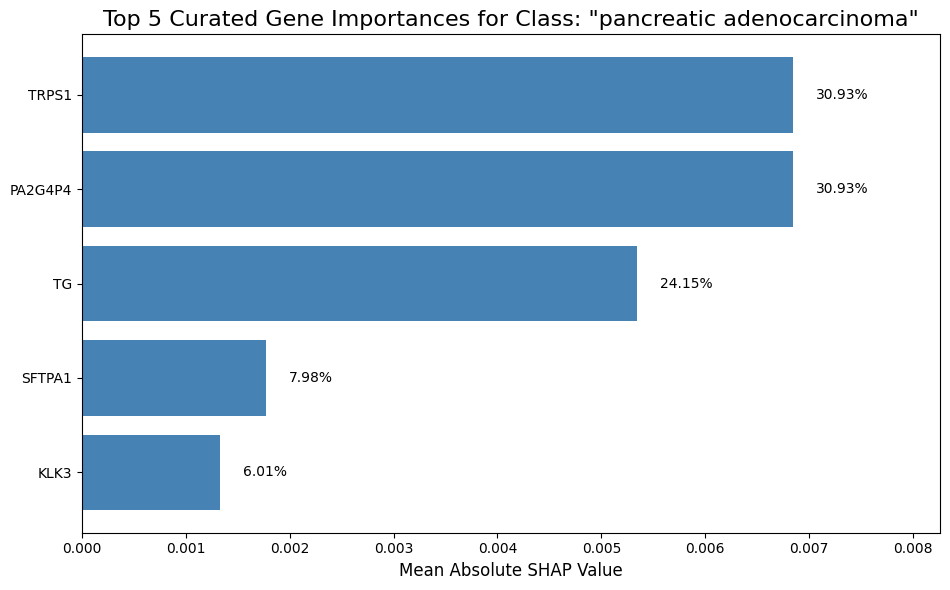

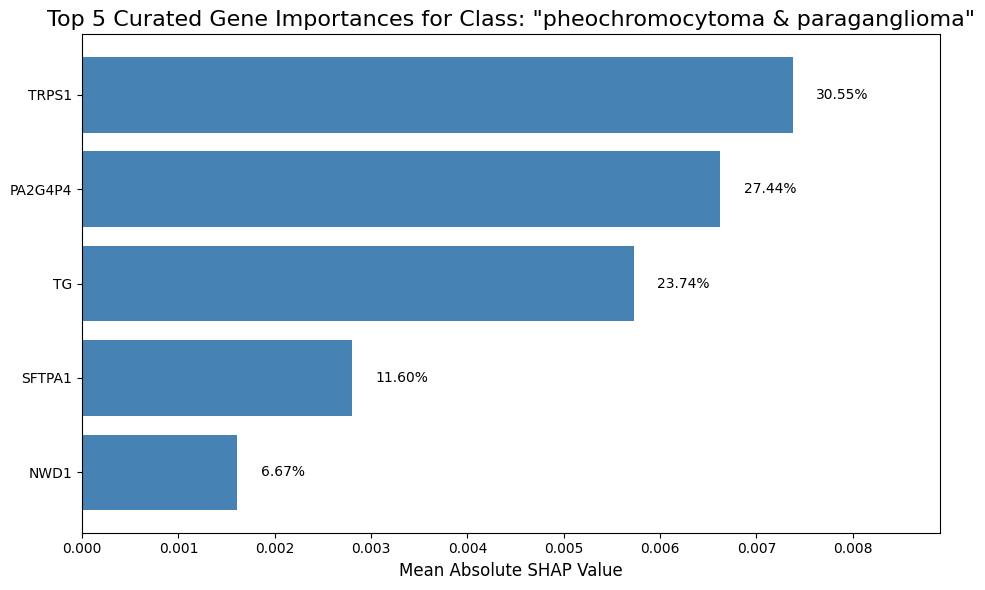

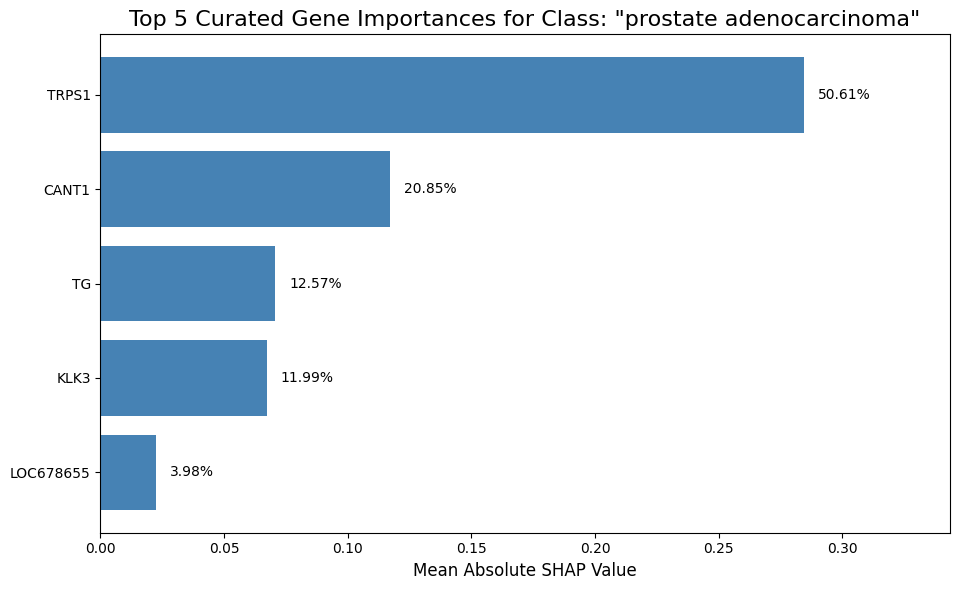

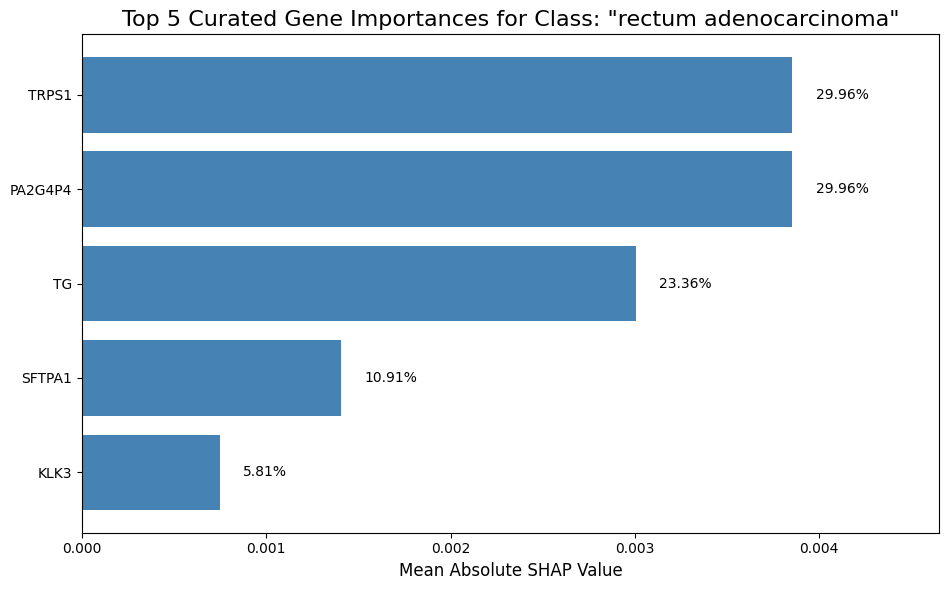

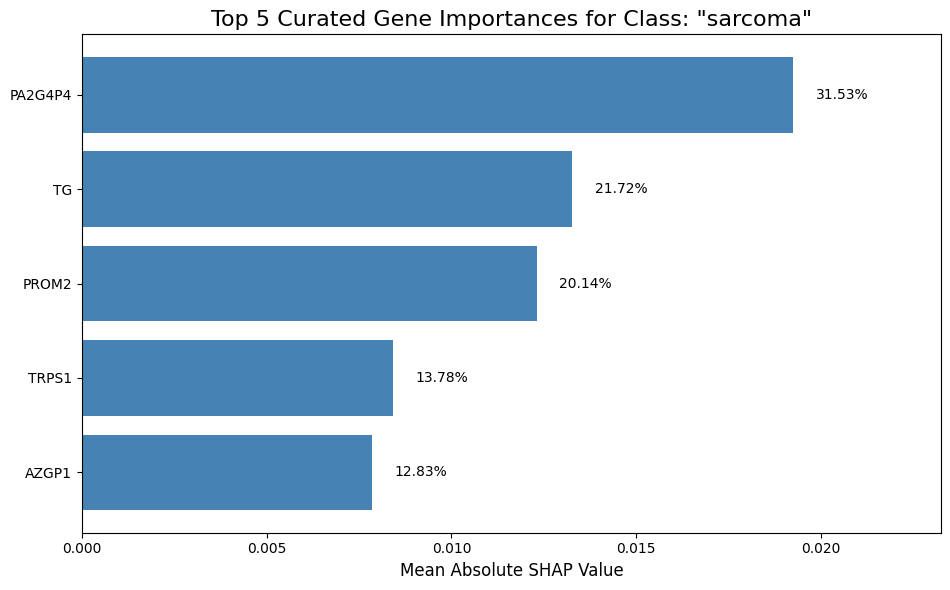

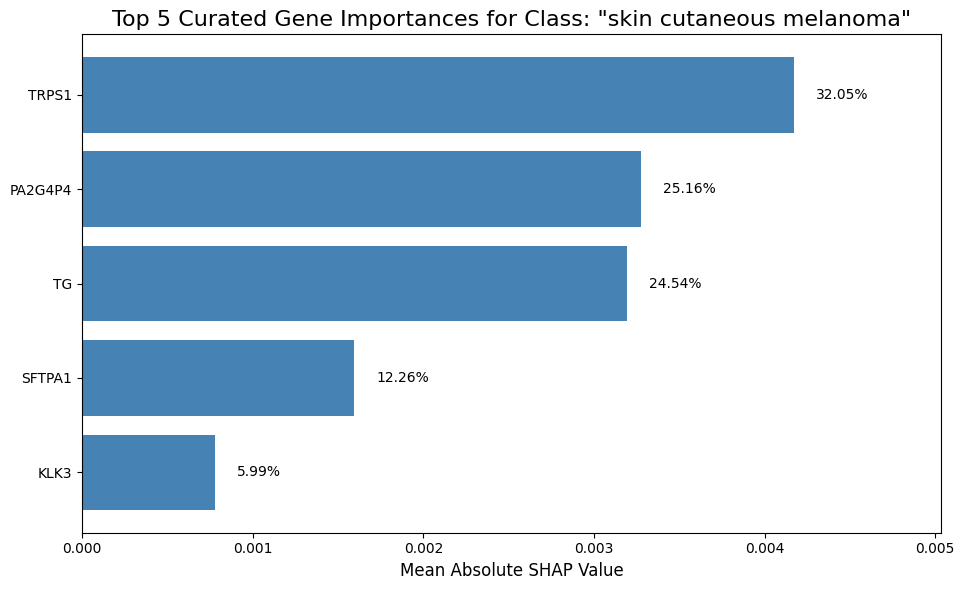

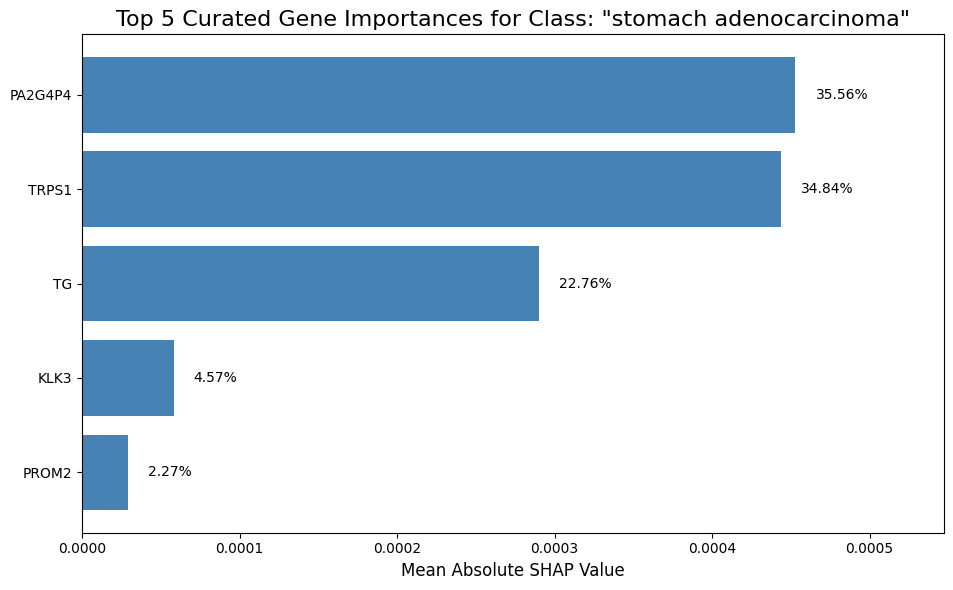

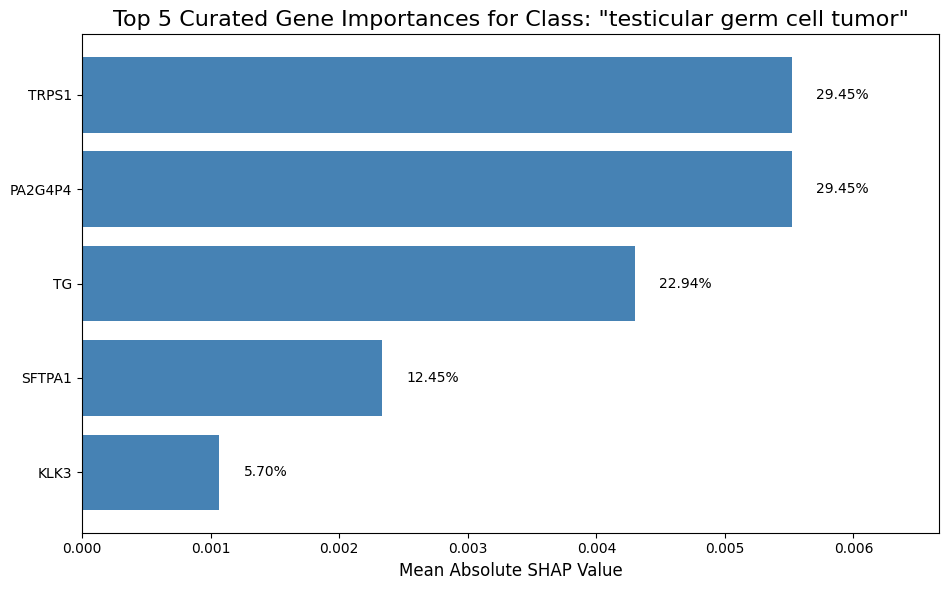

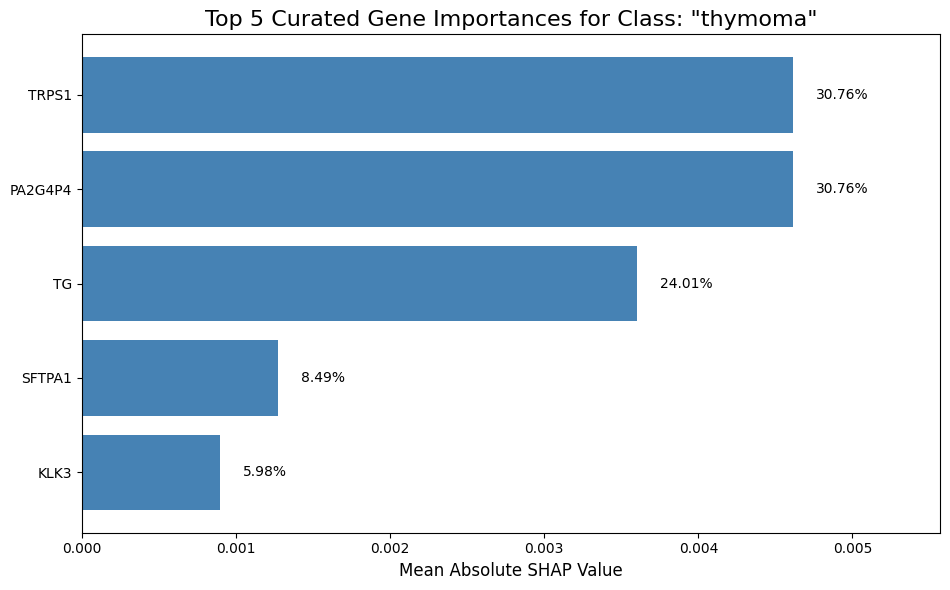

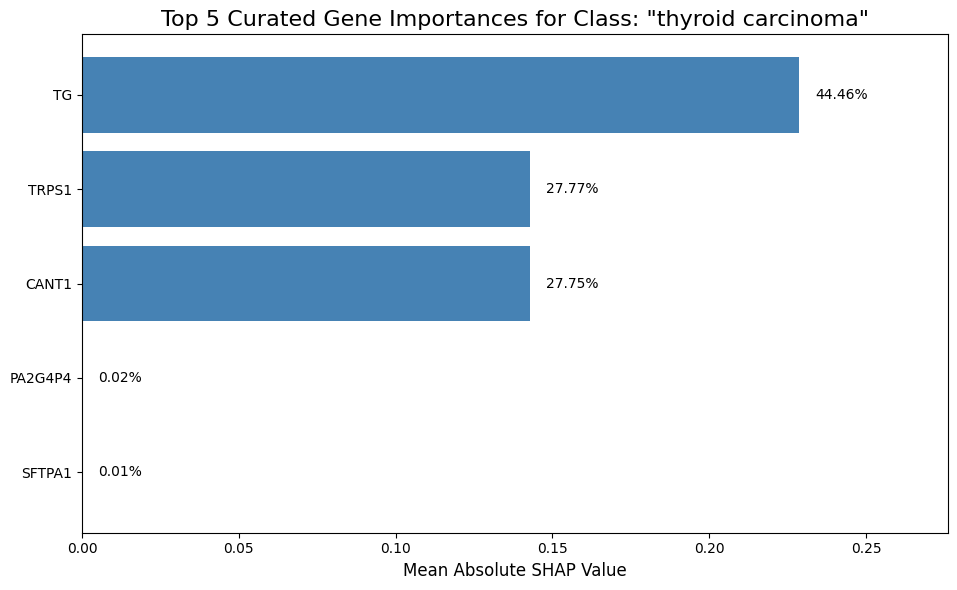

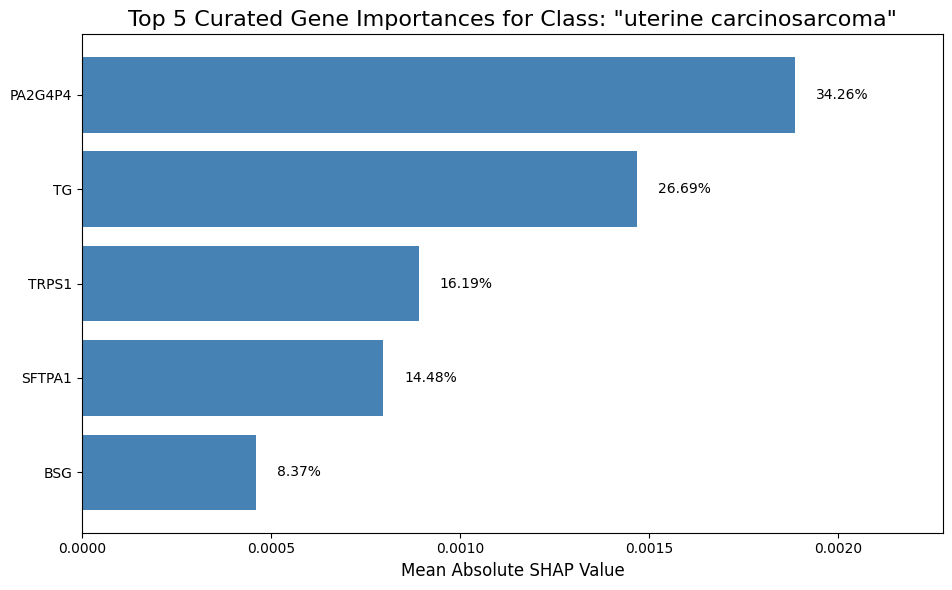

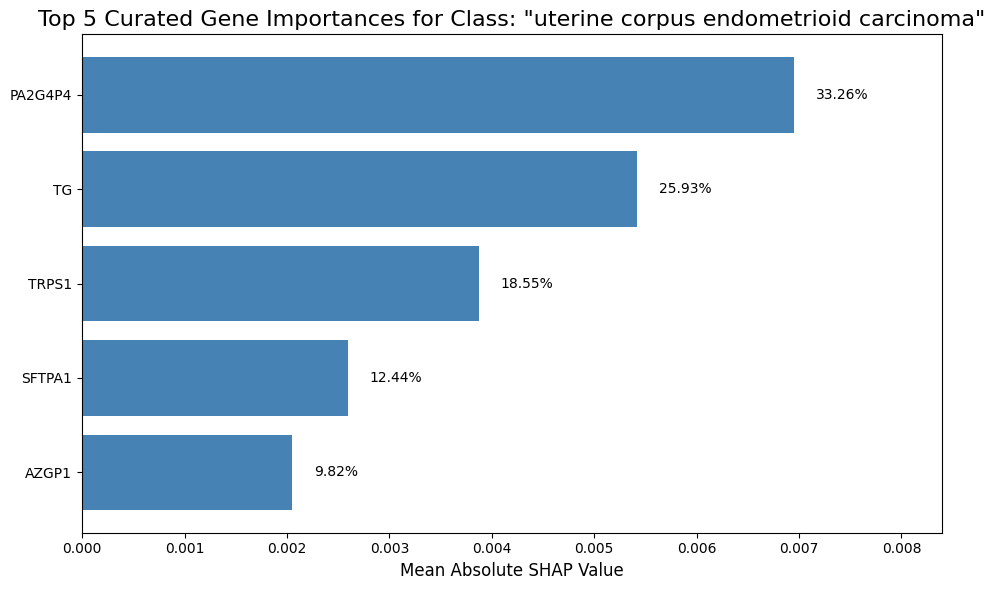

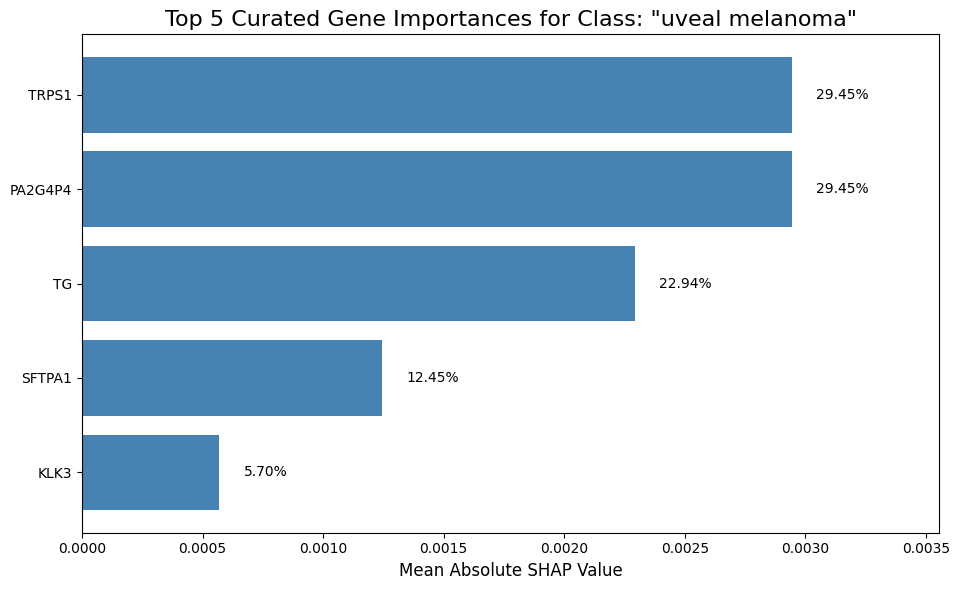

In [ ]:

for class_name, genes_to_plot in top_genes_per_class_DT_with_depth.items():

    # Find the index 'i' corresponding to the current class_name
    # This is needed to slice the correct part of the shap_values array
    i = list(class_names).index(class_name)

    # 1. Get the SHAP values for the current class
    class_shap_values = shap_values[:, :, i]

    # 2. Create the Series of mean absolute SHAP values for ALL features
    # We still need this to look up the values for our selected genes
    feature_importance_series = pd.Series(
        np.abs(class_shap_values).mean(axis=0),
        index=X.columns
    )

    # 3. --- THIS IS THE KEY CHANGE ---
    # Select the importance scores ONLY for your pre-selected genes
    importance_for_selected_genes = feature_importance_series.loc[genes_to_plot]

    # 4. Sort these values for a clean plot (most important at the top)
    sorted_importance = importance_for_selected_genes.sort_values(ascending=False)

    # 5. Calculate percentages based ONLY on the sum of these selected genes
    total_importance_selected = sorted_importance.sum()
    percentages = (sorted_importance / total_importance_selected) * 100

    # 6. Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.barh(sorted_importance.index, sorted_importance.values, color='steelblue')
    ax.invert_yaxis()

    # 7. Annotate each bar with its percentage
    for bar, percentage in zip(bars, percentages):
        ax.text(
            bar.get_width() + (total_importance_selected * 0.01),
            bar.get_y() + bar.get_height() / 2,
            f'{percentage:.2f}%',
            va='center',
            ha='left'
        )

    # --- Formatting ---
    ax.set_title(f'Top {len(genes_to_plot)} Curated Gene Importances for Class: "{class_name}"', fontsize=16)
    ax.set_xlabel('Mean Absolute SHAP Value', fontsize=12)
    plt.tight_layout()
    ax.set_xlim(right=ax.get_xlim()[1] * 1.15) # Make room for annotations

    plt.show()



#DT Depth = None, SHAP

In [ ]:

print("--- Training Decision Tree Classifier With Depth = None ---")
dt_model_none = DecisionTreeClassifier(random_state=42, max_depth=None)
dt_model_none.fit(X_train_scaled, y_train)

# Predictions and Probability Predictions
y_pred_dt_none = dt_model_none.predict(X_test_scaled)
y_proba_dt_none = dt_model_none.predict_proba(X_test_scaled)



##--------------------------------##

#SHAP

# Create SHAP explainer for Random Forest
explainer = shap.TreeExplainer(dt_model_none)

# Get SHAP values for the first 500 samples of X_test
# Use the scaled test data (X_test_scaled) which was used for training
shap_values_none = explainer.shap_values(X_test[:500])

print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of SHAP values: {shap_values_none.shape}")



##---------------------------------##
# PREPROCESS


top_genes_per_class_DT_with_none = {}
N = 5 # Let's find the top 5 genes for each class

# Iterate through the classes (the third dimension of shap_values)
# shap_values shape: (samples, features, classes)
for i in range(shap_values_none.shape[2]):
    # Calculate the mean absolute SHAP value for each gene across all samples for the current class
    global_importance = np.mean(np.abs(shap_values_none[:, :, i]), axis=0)

    # Create a DataFrame for easy sorting
    importance_df = pd.DataFrame({
        'Gene': X.columns,
        'SHAP_Importance': global_importance
    })

    # --- NEW STEP: Filter out the sex-specific genes ---
    filtered_importance_df = importance_df[~importance_df['Gene'].isin(genes_to_exclude)]
    # ----------------------------------------------------

    # Sort by importance and get the top N genes from the *filtered* list
    top_genes = filtered_importance_df.sort_values(by='SHAP_Importance', ascending=False).head(N)

    # Store the results using the actual class name
    class_name = class_names[i]
    top_genes_per_class_DT_with_none[class_name] = top_genes['Gene'].tolist()

# Print the top genes for all classes
print("Top 5 Tumor-Specific Genes per Class (Sex-Specific Genes Removed):")
for class_name, genes in top_genes_per_class_DT_with_none.items():
    print(f" {class_name}: {genes}")





--- Training Decision Tree Classifier With Depth = None ---
Shape of X_test: (1774, 12838)
Shape of SHAP values: (500, 12838, 32)
Top 5 Tumor-Specific Genes per Class (Sex-Specific Genes Removed):
 adrenocortical cancer: ['CYP11A1', 'PA2G4P4', 'TRPS1', 'PHC1', 'SOX17']
 bladder urothelial carcinoma: ['TRPS1', 'FASN', 'PWWP2B', 'TG', 'C6orf134']
 brain lower grade glioma: ['PMP2', 'PA2G4P4', 'TRPS1', 'TG', 'SFTPA1']
 breast invasive carcinoma: ['TRIM29', 'TRPS1', 'AZGP1', 'FUNDC2P2', 'AK5']
 cervical & endocervical cancer: ['PA2G4P4', 'TRPS1', 'SMC1B', 'PHC1', 'TG']
 cholangiocarcinoma: ['PA2G4P4', 'TRPS1', 'ITIH1', 'PER1', 'LYPD6']
 colon adenocarcinoma: ['CDX2', 'TRPS1', 'PA2G4P4', 'TG', 'MLC1']
 diffuse large B-cell lymphoma: ['ADORA2A', 'PA2G4P4', 'TRPS1', 'PHC1', 'CLDN15']
 esophageal carcinoma: ['SIK2', 'TRPS1', 'PHC1', 'CLDN15', 'ADORA2A']
 glioblastoma multiforme: ['PMP2', 'PA2G4P4', 'TRPS1', 'RPL13AP3', 'TG']
 head & neck squamous cell carcinoma: ['TRIM29', 'TRPS1', 'PA2G4P4', 

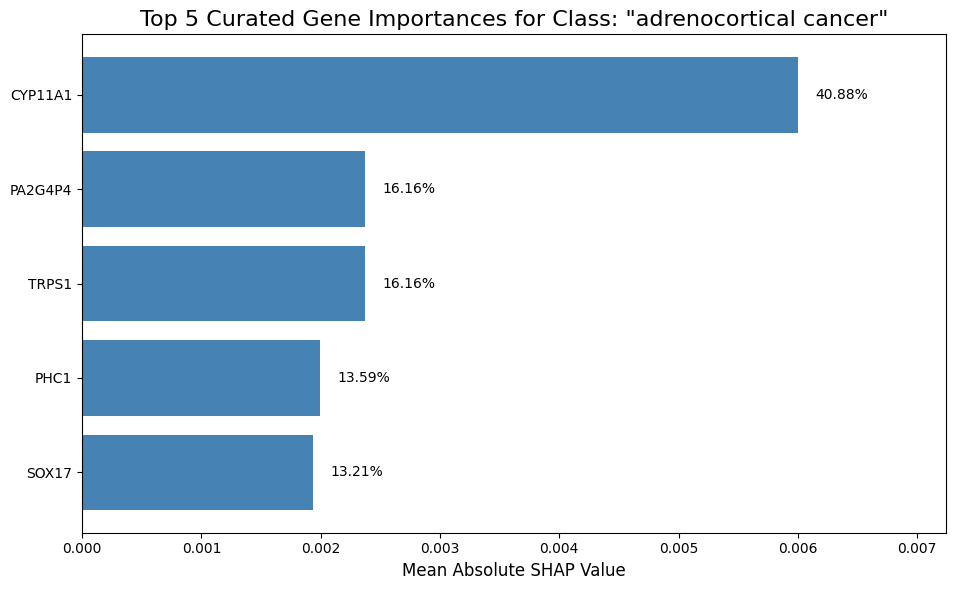

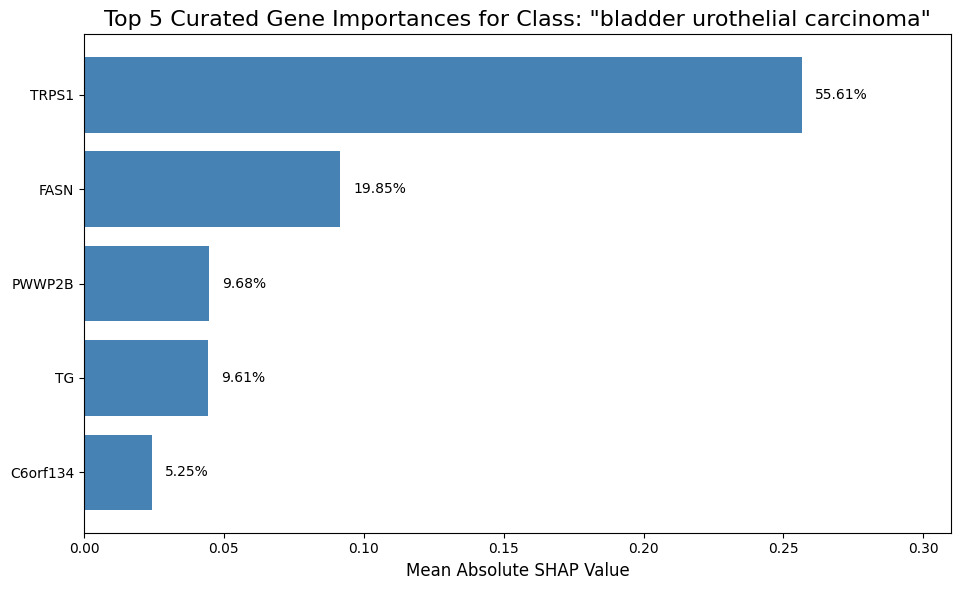

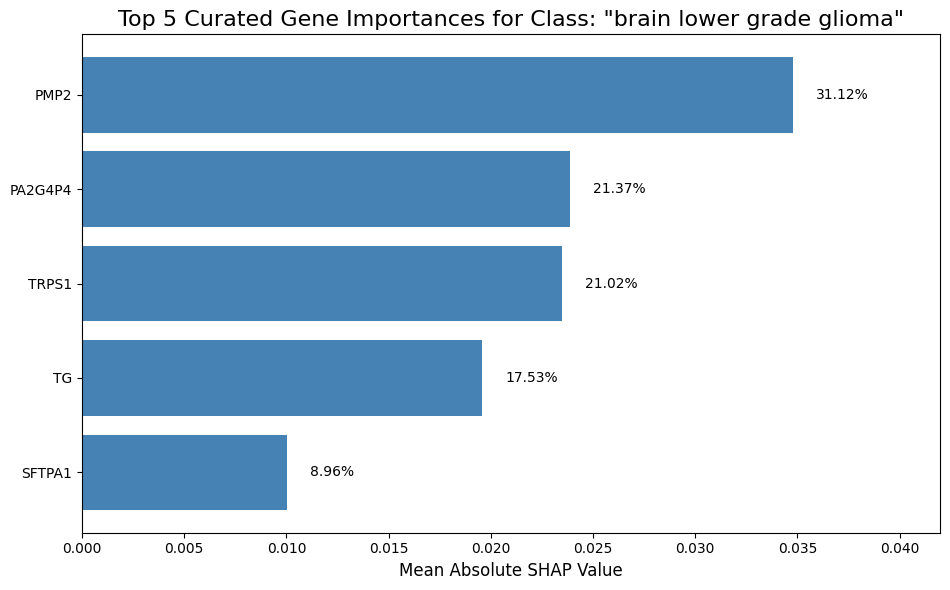

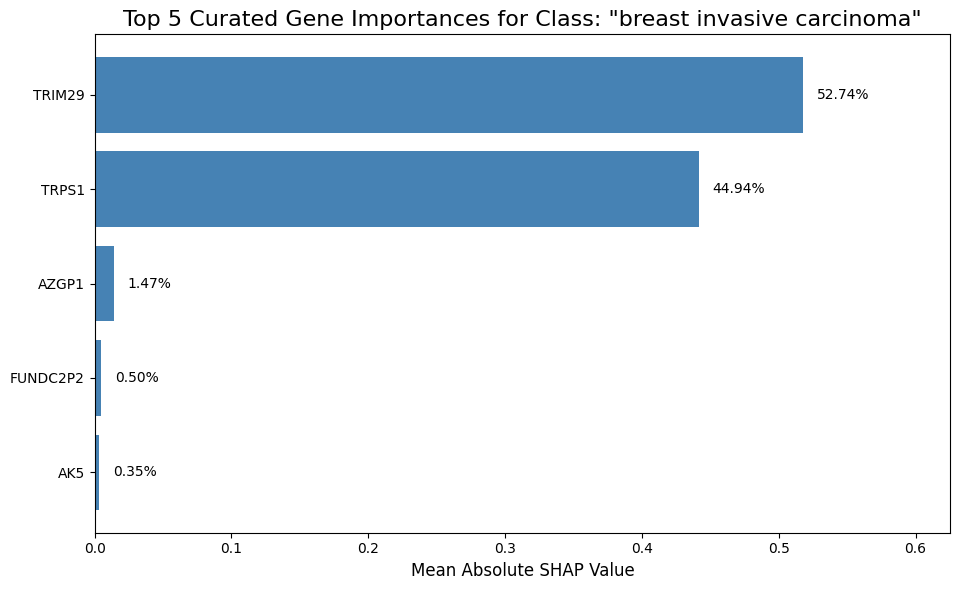

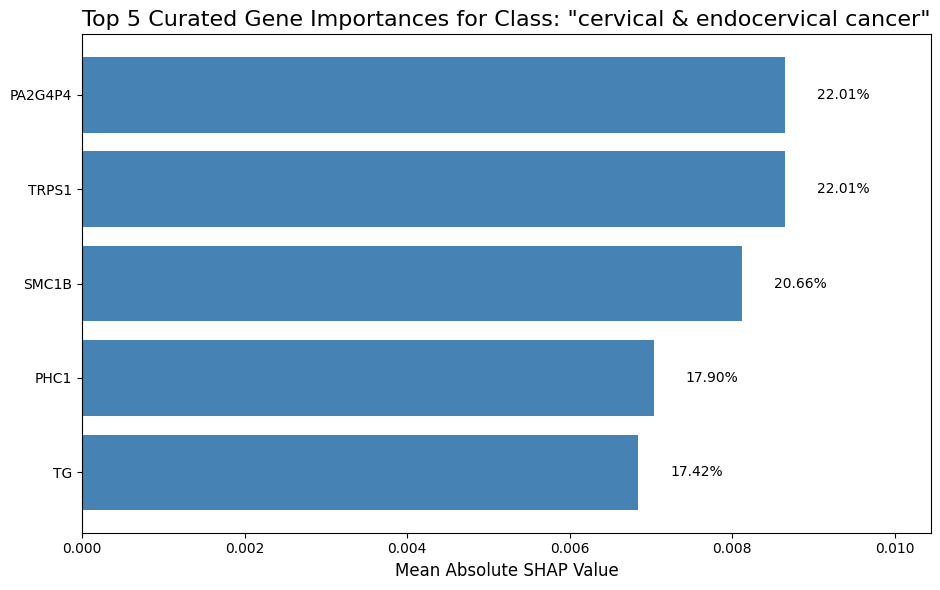

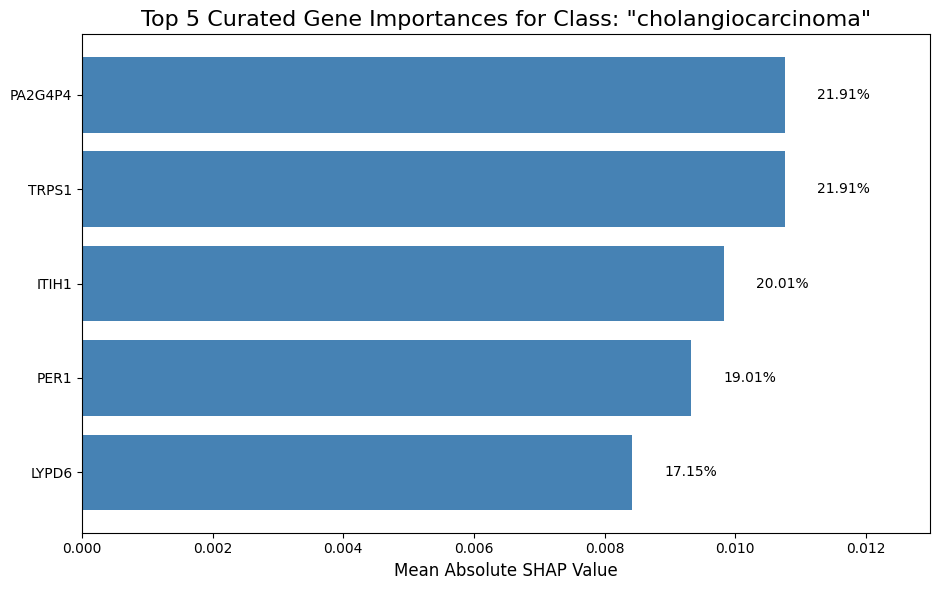

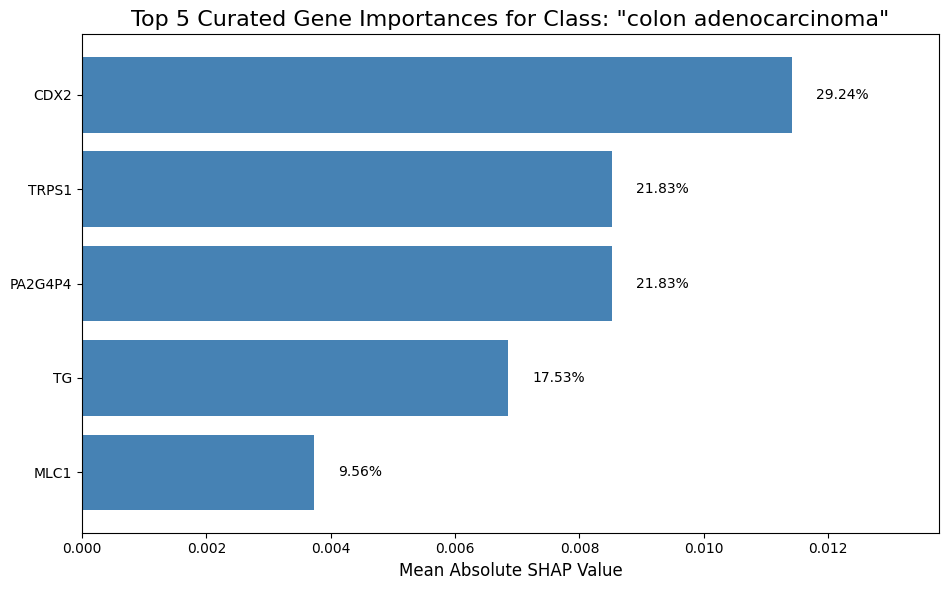

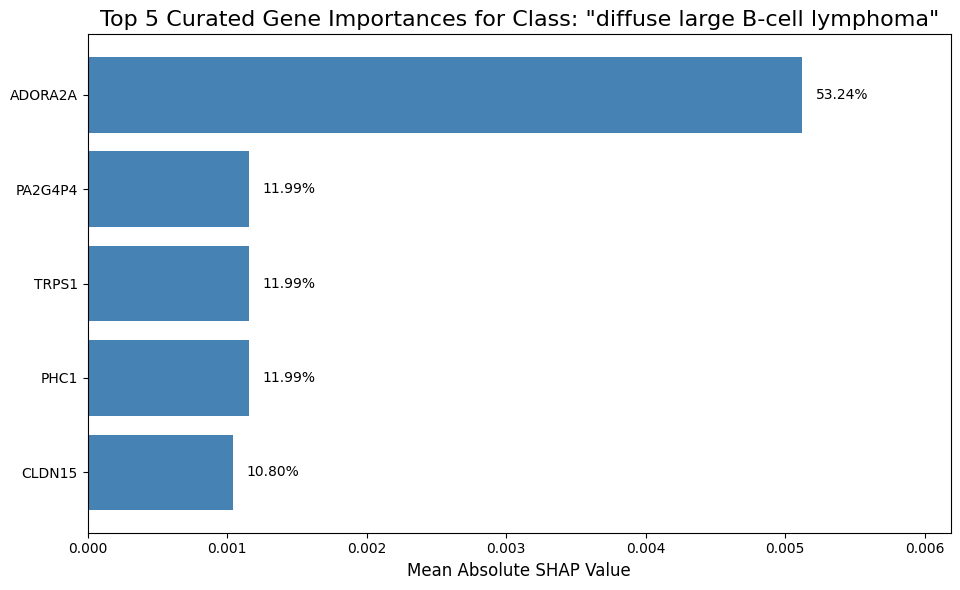

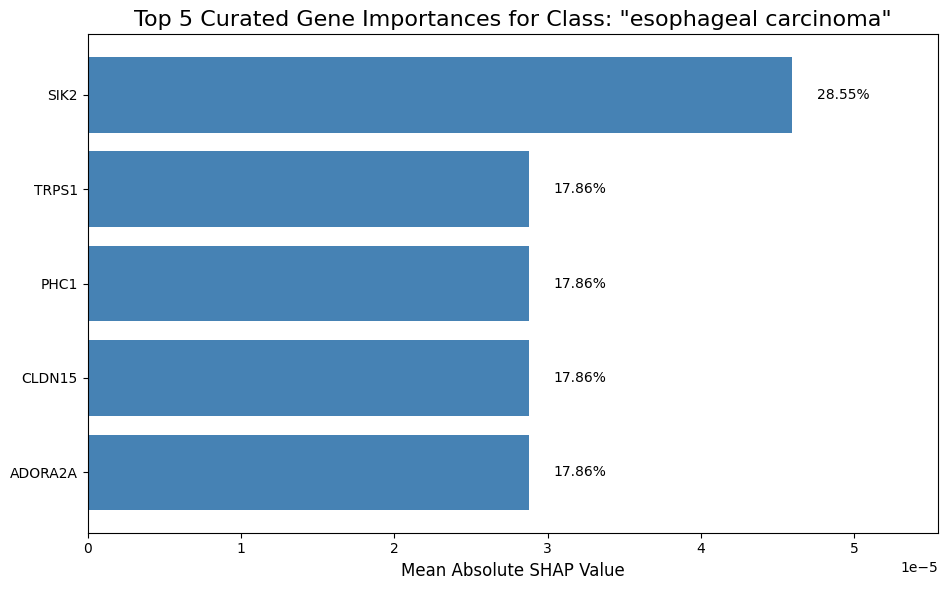

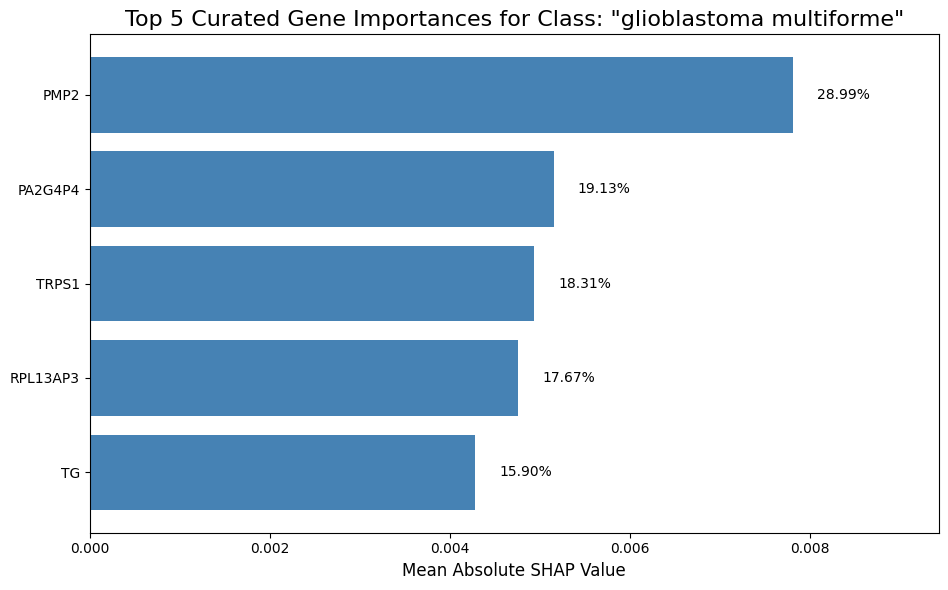

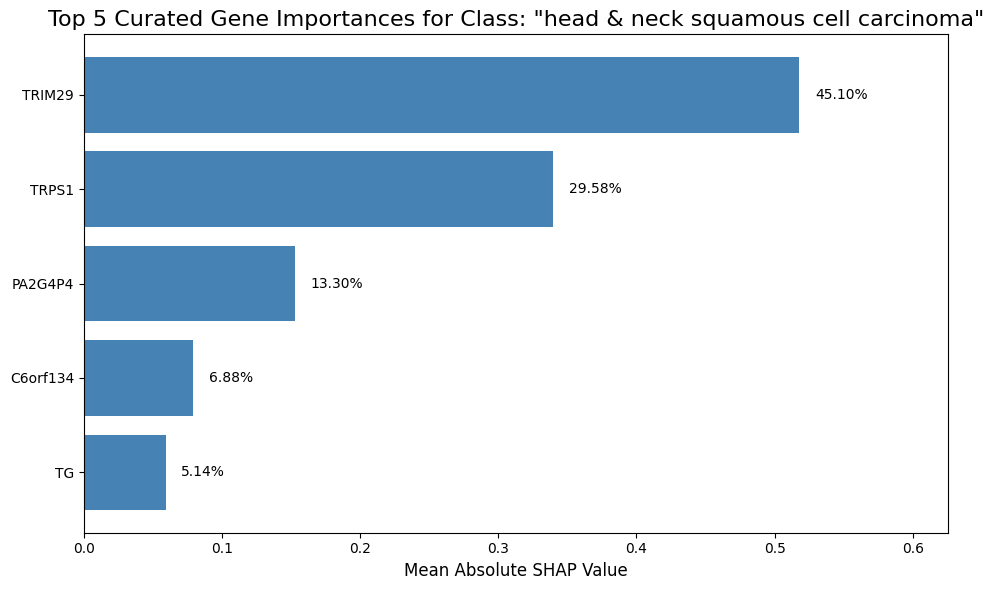

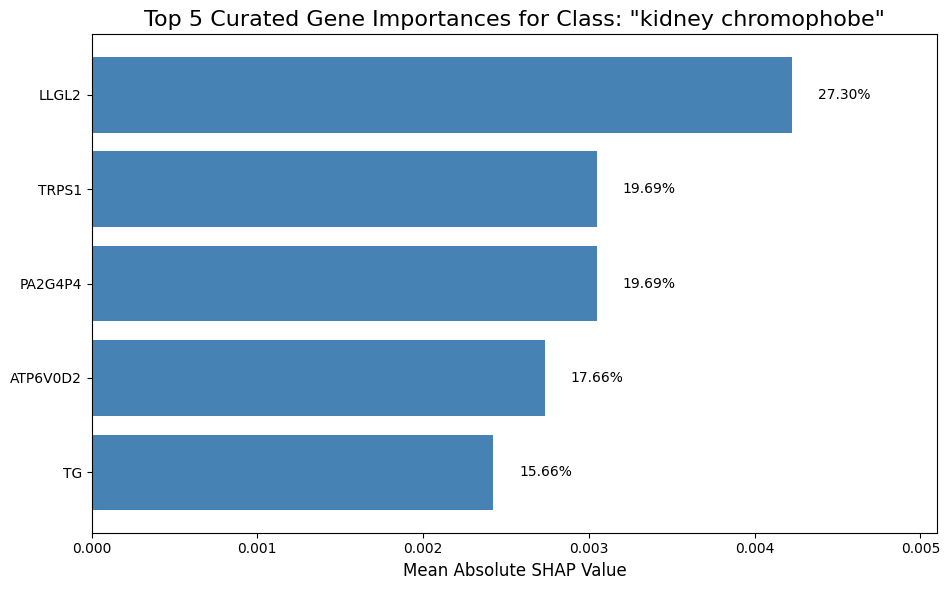

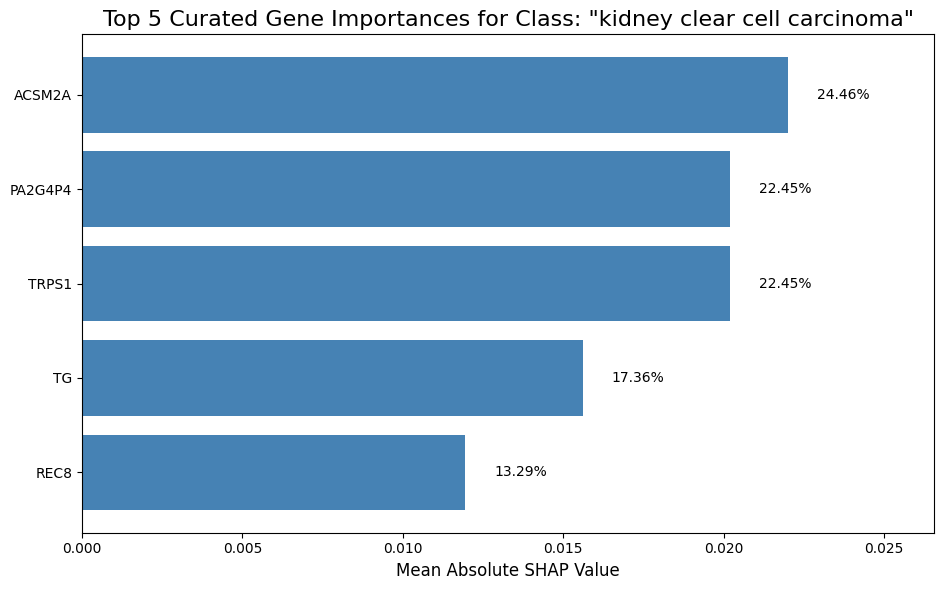

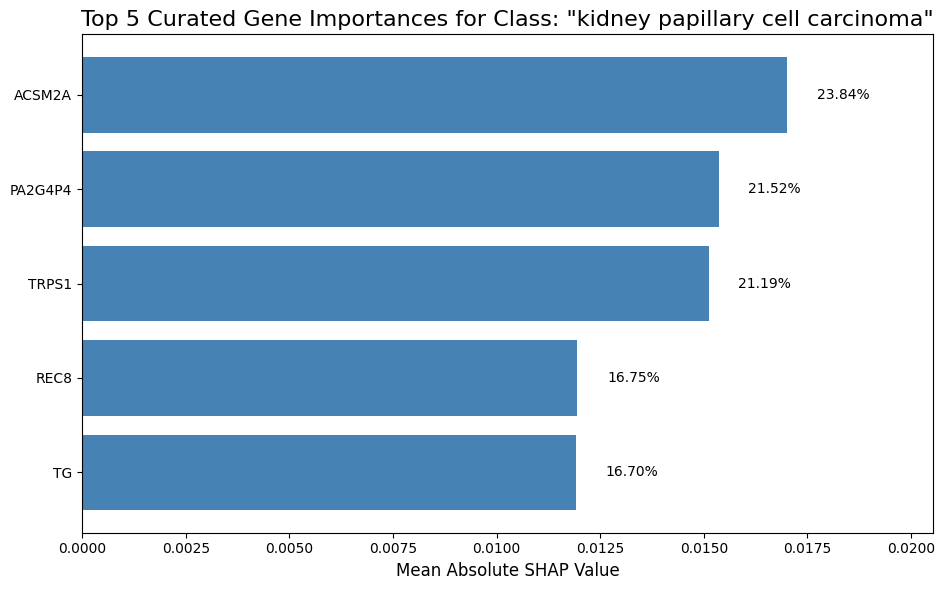

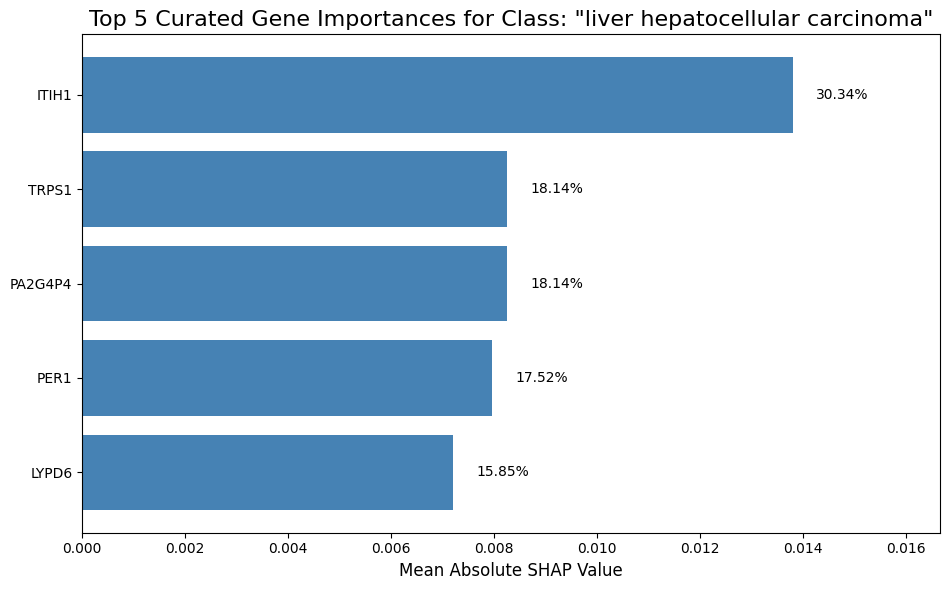

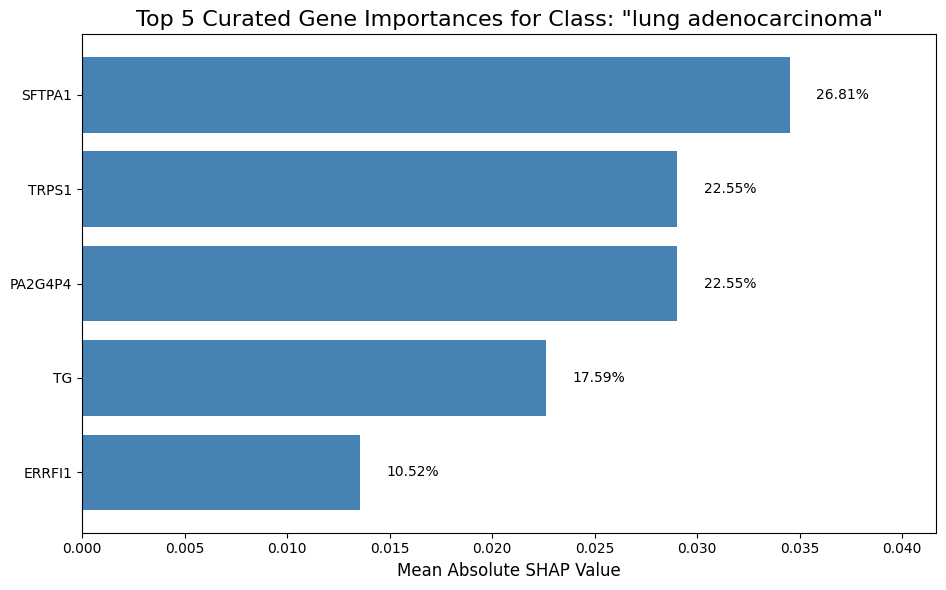

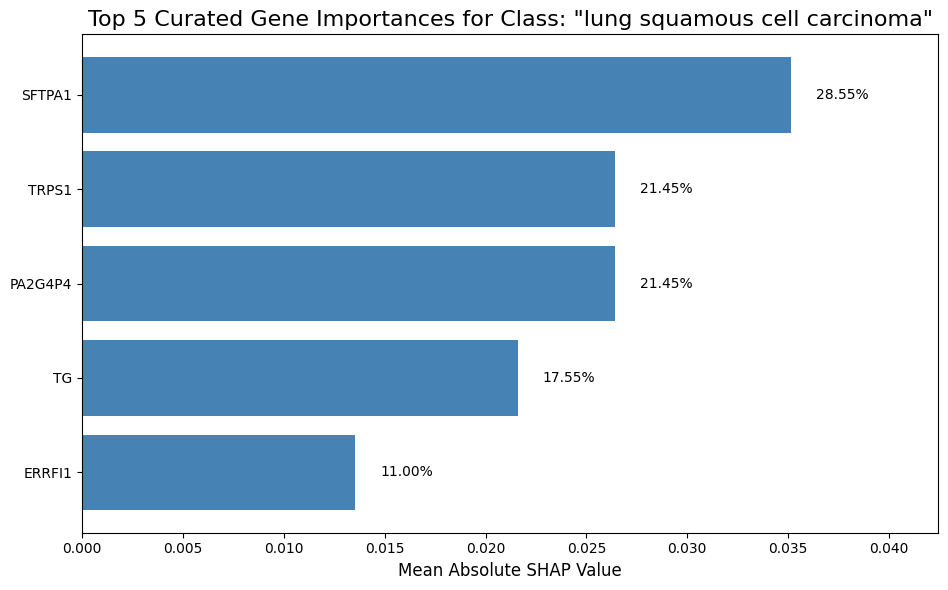

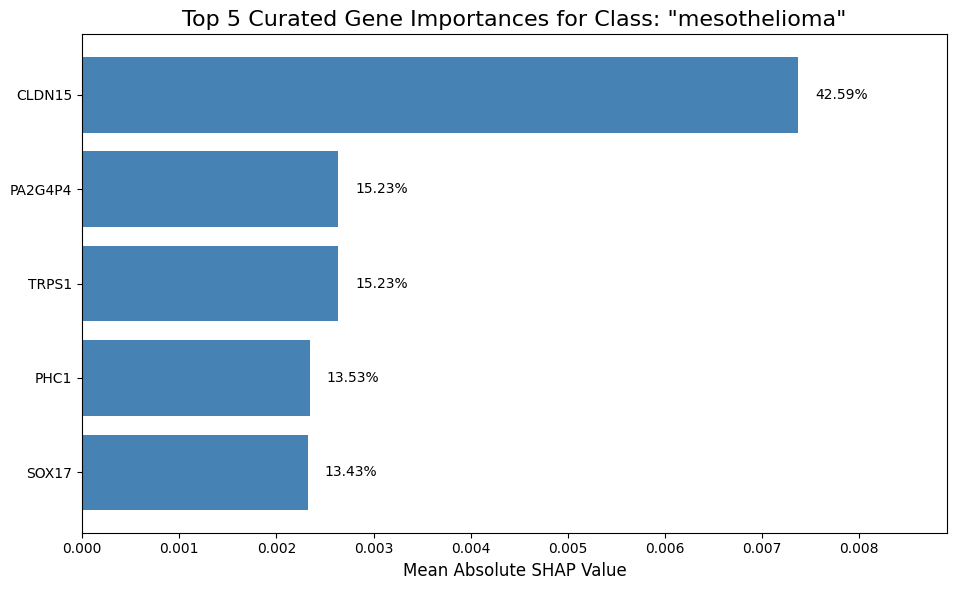

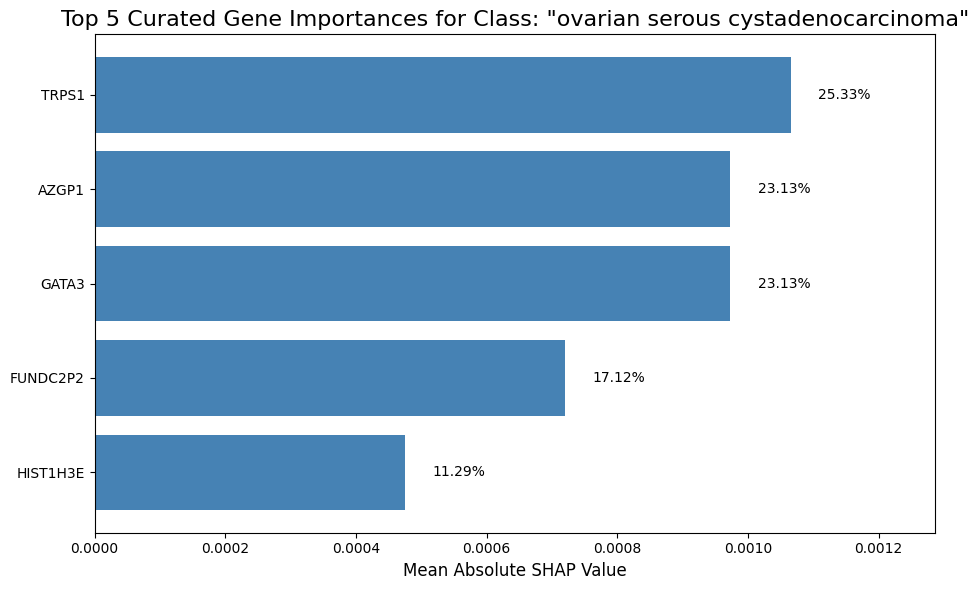

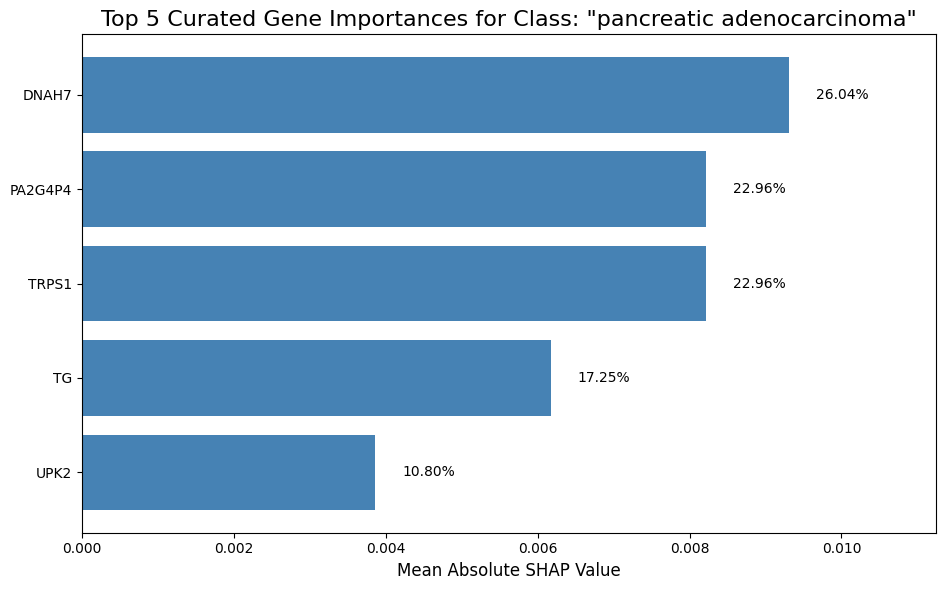

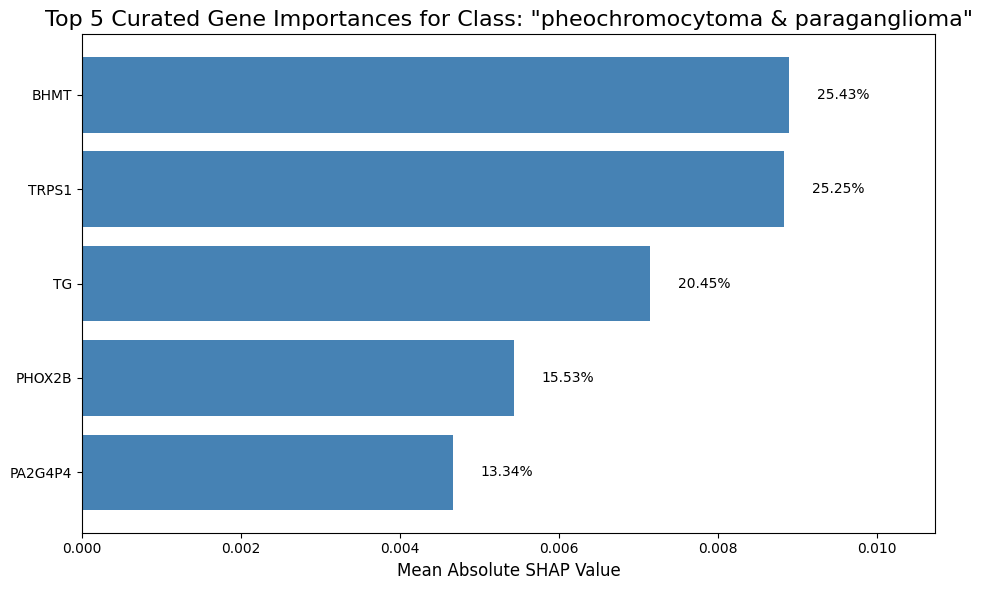

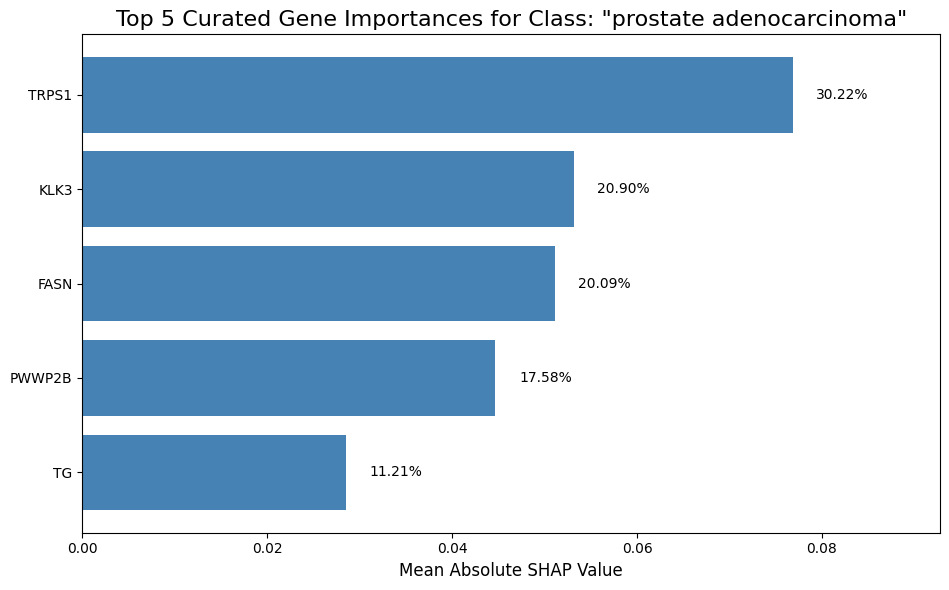

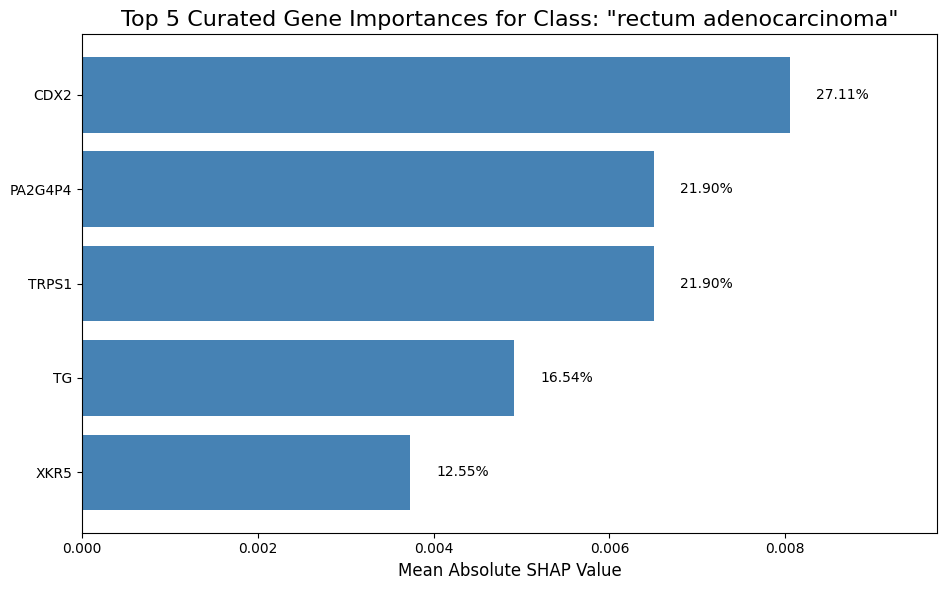

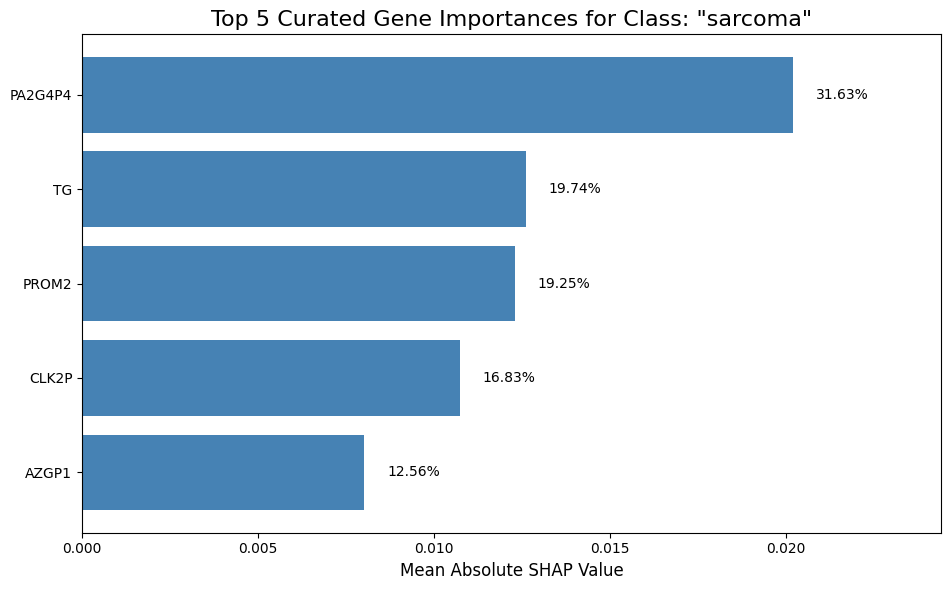

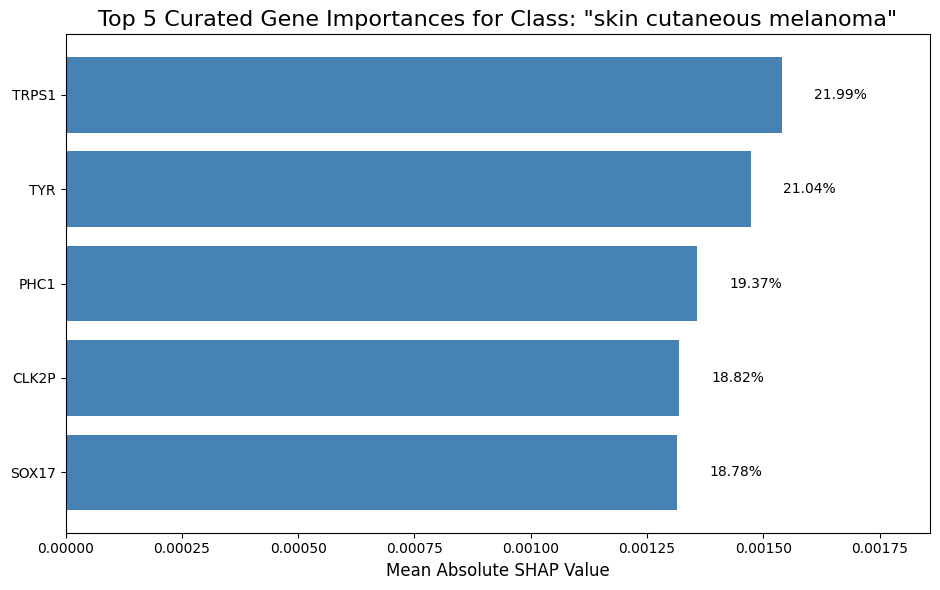

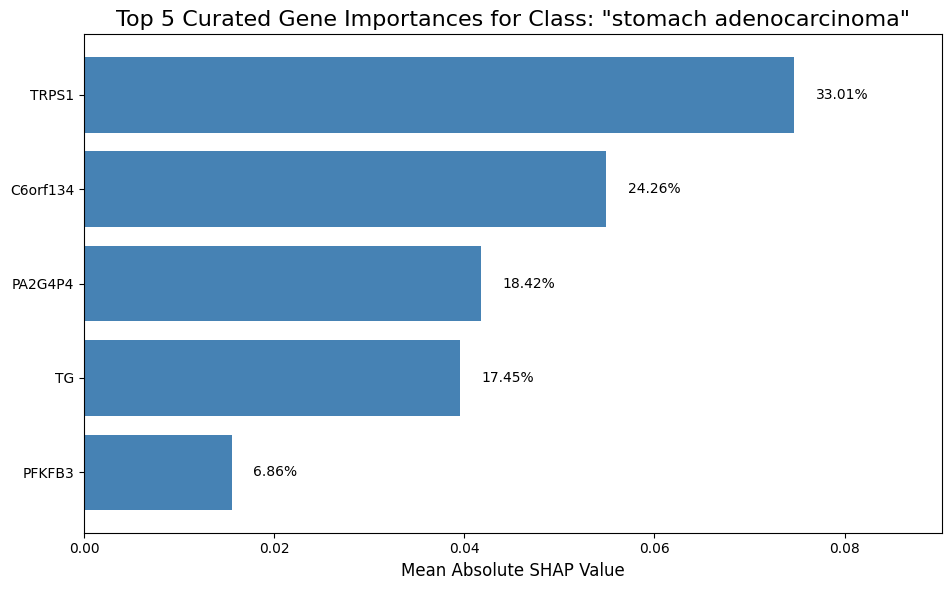

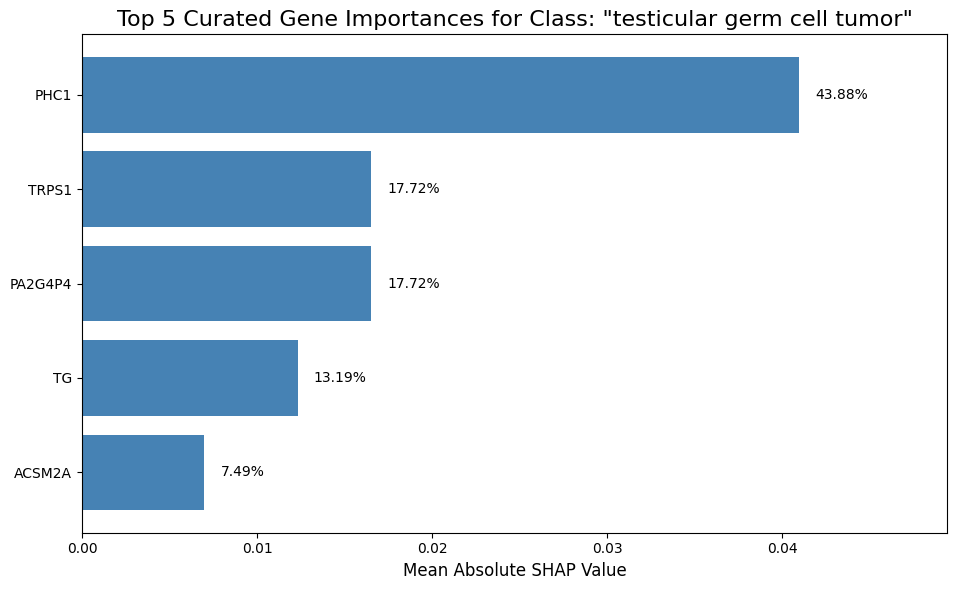

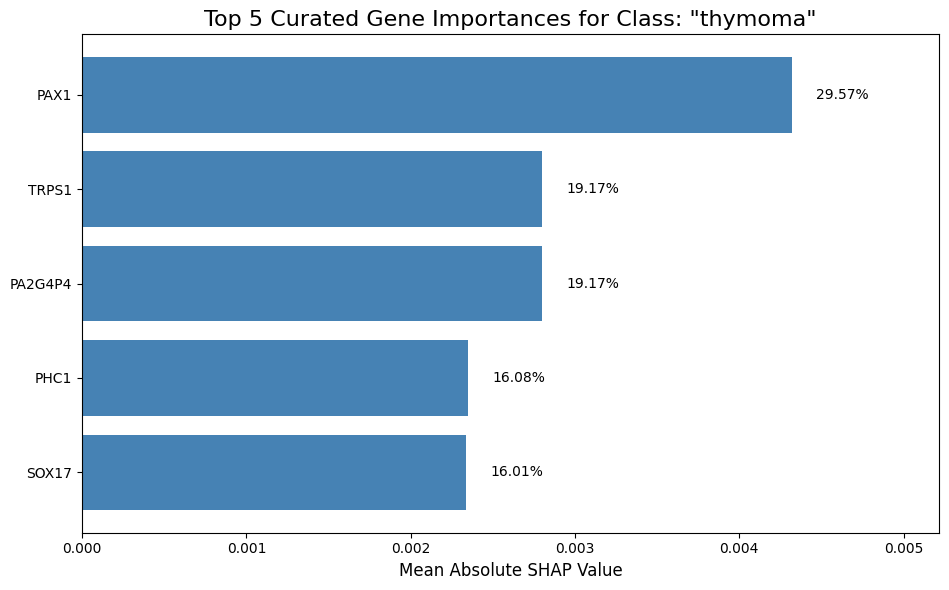

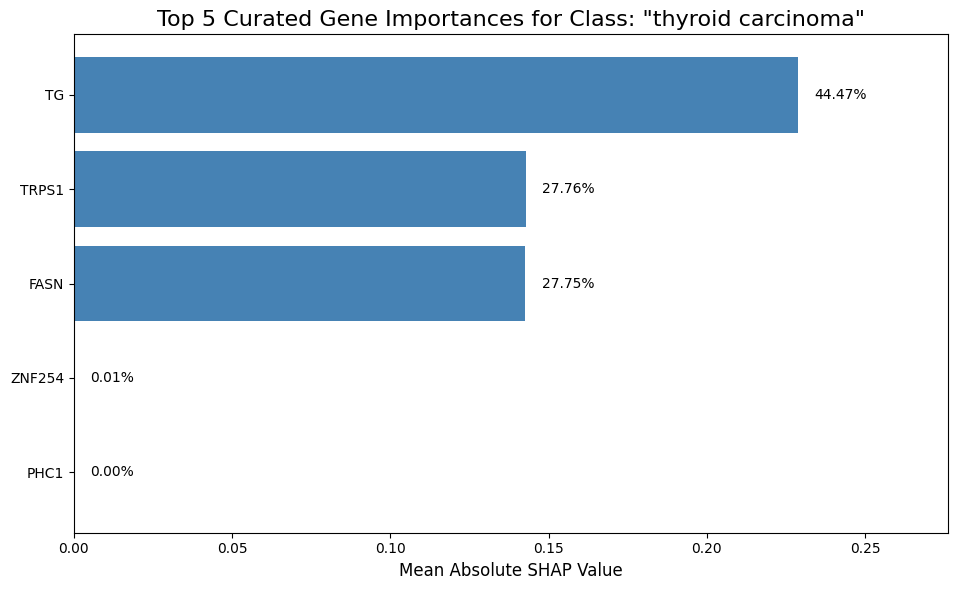

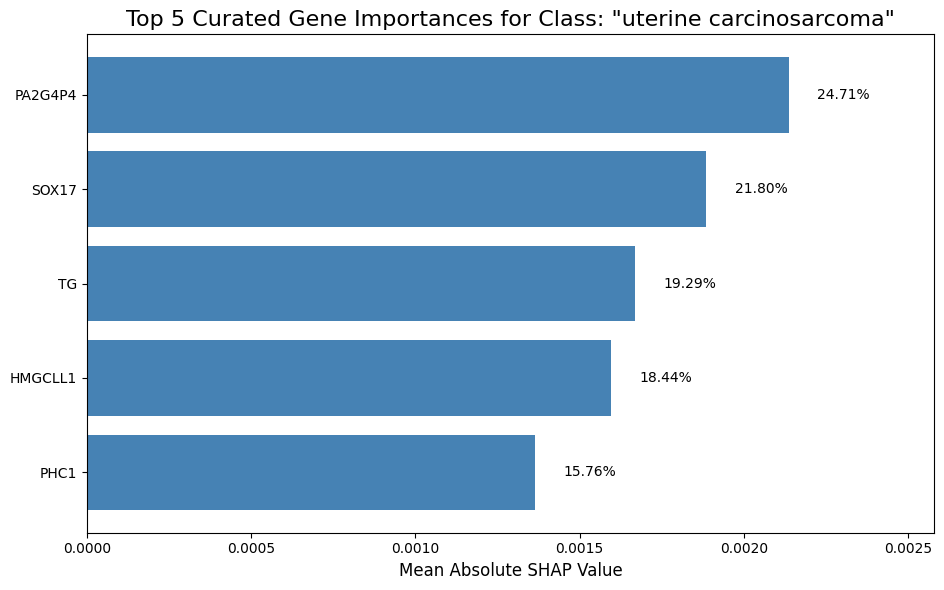

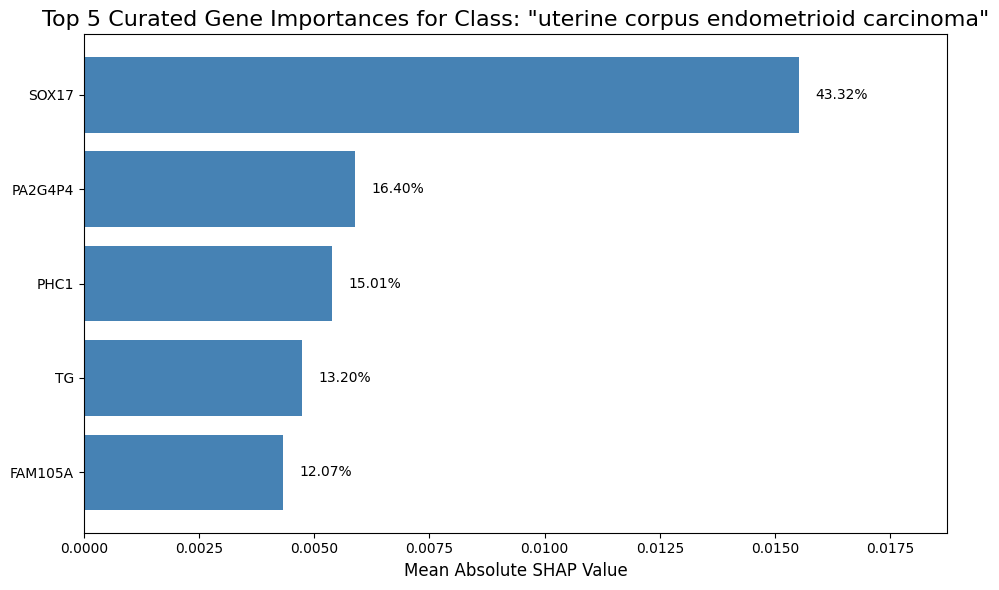

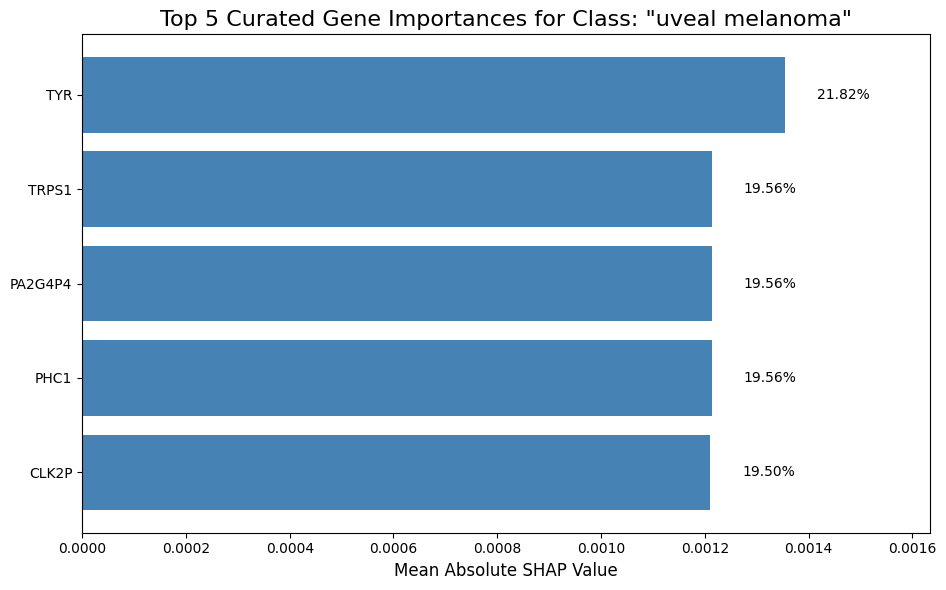

In [ ]:


for class_name, genes_to_plot in top_genes_per_class_DT_with_none.items():

    # Find the index 'i' corresponding to the current class_name
    # This is needed to slice the correct part of the shap_values array
    i = list(class_names).index(class_name)

    # 1. Get the SHAP values for the current class
    class_shap_values = shap_values_none[:, :, i]

    # 2. Create the Series of mean absolute SHAP values for ALL features
    # We still need this to look up the values for our selected genes
    feature_importance_series = pd.Series(
        np.abs(class_shap_values).mean(axis=0),
        index=X.columns
    )

    # 3. --- THIS IS THE KEY CHANGE ---
    # Select the importance scores ONLY for your pre-selected genes
    importance_for_selected_genes = feature_importance_series.loc[genes_to_plot]

    # 4. Sort these values for a clean plot (most important at the top)
    sorted_importance = importance_for_selected_genes.sort_values(ascending=False)

    # 5. Calculate percentages based ONLY on the sum of these selected genes
    total_importance_selected = sorted_importance.sum()
    percentages = (sorted_importance / total_importance_selected) * 100

    # 6. Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.barh(sorted_importance.index, sorted_importance.values, color='steelblue')
    ax.invert_yaxis()

    # 7. Annotate each bar with its percentage
    for bar, percentage in zip(bars, percentages):
        ax.text(
            bar.get_width() + (total_importance_selected * 0.01),
            bar.get_y() + bar.get_height() / 2,
            f'{percentage:.2f}%',
            va='center',
            ha='left'
        )

    # --- Formatting ---
    ax.set_title(f'Top {len(genes_to_plot)} Curated Gene Importances for Class: "{class_name}"', fontsize=16)
    ax.set_xlabel('Mean Absolute SHAP Value', fontsize=12)
    plt.tight_layout()
    ax.set_xlim(right=ax.get_xlim()[1] * 1.15) # Make room for annotations

    plt.show()



In [ ]:
print('Done')

Done
